<a href="https://colab.research.google.com/github/MatiasVelazcoGonzalez/AD/blob/main/Copia_de_Hito_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 3: Aplicación de técnicas de aprendizaje no supervisado y redes neuronales en datos operacionales

Fecha de entrega: 21 de septiembre

Base de datos: ASARCO_CAEX.csv

Integrantes:
- Scarlett Duran  
- Matias Velazco  
- Andreina Isabel Manrique Espin  
- Paz Montaño  
- Sebastián Galleguillos Neyth  

## Objetivo de la **Parte 1** (Exploración, KPIs operacionales y clustering no supervisado)

Para esta primera etapa trabajaremos con la base de datos **ASARCO_CAEX.csv**. El foco es:
(i) depurar y estandarizar los datos;
(ii) calcular indicadores clave de **Disponibilidad** y **Utilización efectiva** conforme a las **fórmulas atribuidas a ASARCO (American Smelting and Refining Company)**;
(iii) explorar patrones; y
(iv) identificar **clústeres operacionales** con métodos no supervisados (**k-means** y **DBSCAN**), comparando resultados **con y sin** reducción de dimensionalidad (**PCA**).


 1) Estudio preparatorio de datos (duplicados, aberrantes, *missing values*, entre otros)
- Chequeo integral de duplicados, outliers/aberrantes, valores faltantes y consistencia de claves (equipo, turno, fecha).
- Documentación de reglas de limpieza y decisiones.


 2) Cálculo de indicadores claves diario por equipo (Disponibilidad y Utilización efectiva por equipo, turno y día)
- Cálculo de **Disponibilidad** y **Utilización efectiva** por equipo/turno/día.
- Explicitar fórmulas, supuestos y fuentes de tiempo (planificado, paros programados/no programados, en operación, en espera) conforme a las fórmulas ASARCO usadas en la industria.

3) Estudio exploratorio de datos disponibles (incluyendo las variables antes calculadas)
- Descripción de distribuciones, estacionalidades y tendencias por equipo/turno/día.
- Relación entre KPIs y variables explicativas disponibles.

 4) Utilizar los métodos no supervisados **k-means** y **DBSCAN** para identificar patrones operacionales entre los equipos
- Entrenamiento en el espacio original (normalizado para k-means).
- Búsqueda de parámetros (k en k-means; *eps* y *min_samples* en DBSCAN).
**Obtención:** Identificación y asignación de clústers por equipo/turno/día + parámetros seleccionados.

 5) Realizar un análisis de componentes principales (**PCA**) para explicar ≥ 80% de la varianza
- Estandarización de variables operacionales y ejecución de PCA.
- Reporte de **varianza explicada acumulada** y **loadings**; selección de factores que capten **≥ 80%** de la varianza.
**Obtención:** Componentes principales seleccionados + interpretación operacional de factores.

 6) Repetir **k-means** y **DBSCAN** utilizando los factores de **PCA** y comparar con los resultados sin PCA
- Entrenamiento de ambos métodos en el espacio reducido (PCA).
- Comparación de desempeño/estabilidad vs. línea base (sin PCA).
**Obtención:** Asignaciones de clústeres (con PCA) + cuadro comparativo (con/sin PCA).

 7) Analizar el desempeño en términos del **coeficiente de silueta**; sensibilidad de **k** (k-means) y de hiperparámetros (DBSCAN)
- Curvas de silueta y codo (*elbow*) para k-means; rejilla sobre *eps* y *min_samples* para DBSCAN.
- Reporte de métricas internas (Silueta, Davies–Bouldin, Calinski–Harabasz) y efecto en número de clústeres/ruido.
**Obtención:** Gráficos de sensibilidad + tabla de métricas por configuración.

 8) Recomendar un método de clustering no supervisado como alternativa final (justificación)
- Selección entre **k-means** o **DBSCAN** (con/sin PCA) considerando métricas, interpretabilidad y estabilidad.
**Obtención:** Recomendación final con justificación breve y parámetros propuestos.

 9) Analizar resultados visualizando grupos en función de **Disponibilidad** y **Utilización**; interpretar cada clúster
- Visualizaciones 2D (p.ej., PCA1–PCA2) y perfiles por clúster (medianas, IQR).
- Interpretación operacional de cada clúster (si es posible) y hallazgos clave.
**Obtención:** Gráficos 2D, tablas resumen por clúster y narrativa de interpretación.

## Objetivo de la **Parte 2** (Modelo predictivo temporal de Utilización Efectiva)

La finalidad de esta etapa es generar un **modelo predictivo temporal** de la **Utilización efectiva**, con el fin de estimar indicadores de desempeño claves y entregar proyecciones para la operación. Se aplicarán técnicas de **redes neuronales** adaptadas a datos temporales, evaluando su desempeño, importancia de variables y sensibilidad a hiperparámetros. Finalmente, se presentará un pronóstico mensual e implicancias prácticas para la gestión operacional.

1) Aplicación de un modelo de redes neuronales para predecir la Utilización efectiva
- Construcción de un modelo temporal que prediga la **Utilización efectiva** diaria/secuencial.
- Incorporación de otras variables disponibles, incluyendo rezagos de la propia Utilización efectiva (si corresponde).
- División de entrenamiento y prueba respetando la **secuencia temporal** (sin mezclar periodos pasados y futuros).

2) Cálculo de métricas de desempeño
- Evaluación cuantitativa mediante **MAE, MSE y RMSE** del modelo resultante en entrenamiento y testeo.

3) Evaluación de importancia de variables
- Aplicación de técnicas de **importancia de variables**.
- Identificación de las variables y rezagos que más contribuyen a la predicción de Utilización efectiva.

4) Análisis de sensibilidad a hiperparámetros
- Exploración de distintos valores en hiperparámetros relevantes (ventana temporal, número de neuronas, *dropout*, tasa de aprendizaje, batch size).
- Comparación de desempeño (RMSE en test) entre configuraciones.

5) Presentación de un modelo de proyección de Utilización efectiva para el próximo mes
- Generación de un **pronóstico mensual** con intervalos de confianza.
- Discusión de **implicancias prácticas**: planificación de turnos, mantenimiento, metas de utilización y gestión de desempeño.


# 1 Estudio preparatorio de datos en ASARCO_CAEX.csv




- Iniciar sesión en google **colab**

In [ ]:
# Iniciamos sesion en nuestro entorno de GDrive
from google.colab import drive
# content/drive es el PATH por defecto donde se encuentra <Mi unidad>
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


-  Importando librerias


In [ ]:
# ==============================
# Estándar de Python (sistema, tiempo, fechas, matemáticas)
# ==============================
import os                          # Operaciones con archivos y directorios
import glob                        # Búsqueda de archivos con patrones (wildcards)
import time                        # Funciones de tiempo (pausas, timestamps)
from time import perf_counter      # Cronometrar ejecución de fragmentos
import math                        # Funciones matemáticas básicas
import datetime                    # Manejo de fechas y horas

# ==============================
# Números y datos
# ==============================
import numpy as np                 # Arreglos y operaciones vectorizadas
import pandas as pd                # DataFrames y manipulación de datos

# ==============================
# Visualización
# ==============================
import matplotlib.pyplot as plt    # Gráficos 2D base y personalizables
plt.style.use('ggplot')            # Estilo por defecto para Matplotlib
from matplotlib.patches import Patch        # Parches (para leyendas personalizadas)
from matplotlib.colors import Normalize     # Normalizar valores a [0,1] (colormaps)
from matplotlib.cm import ScalarMappable    # Mapear valores a colores
from mpl_toolkits.mplot3d import Axes3D     # Soporte 3D (proyección='3d')
import seaborn as sns                       # Gráficos estadísticos de alto nivel
import plotly.express as px                 # Gráficos interactivos rápidos
import plotly.graph_objects as go           # Gráficos interactivos detallados

# ==============================
# Estadística y econometría
# ==============================
from scipy import stats                     # Distribuciones y tests estadísticos
from scipy.stats import gaussian_kde, pearsonr  # KDE y correlación de Pearson
import statsmodels.api as sm                # Modelos econométricos/estadísticos
from matplotlib import cm
import statsmodels.formula.api as smf       # Fórmulas estilo R (patsy)

# ==============================
# Machine Learning: preproceso, modelos y métricas
# ==============================
from sklearn.impute import KNNImputer       # Imputación KNN para NA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Escalado
from sklearn.model_selection import train_test_split            # Train/Test split

# Modelos supervisados (regresión)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Selección de características
from sklearn.feature_selection import SelectKBest, f_regression

# Métricas de regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# No supervisado: reducción y clustering
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs                     # Datos sintéticos
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import (
    silhouette_score, silhouette_samples,                  # Calidad de clusters
    homogeneity_score, completeness_score,
    pairwise_distances
)

# ==============================
# Utilidades para notebooks
# ==============================
import ipywidgets as widgets                 # Controles interactivos en Jupyter
from IPython.display import display, clear_output  # Mostrar y limpiar salidas
from scipy.stats import zscore               # Estandarización rápida (útil en exploración)
import nbformat                              # Leer/escribir notebooks programáticamente


Se utilizaron las librerías anteriores dado que son las más comunes en el manejo de datos y fueron enseñadas en el módulo auxiliar.

- Lectura y guardado de archivos

A continuación se muestra una tabla que contiene los `readers` y `writers` disponibles.


|   Tipo de Formato   | Descripción de la Data |  Reader  |  Writer |
| -------             | :-----                 |  :-----: | :-----: |
| text   |  CSV |  read_csv | to_csv |
| text |  Fixed-Width Text File| read_fwf |  |
| text   |  JSON | read_json | to_json |
| text   |  HTML |  read_html | to_html |
| text    |  Local clipboard|  read_clipboard | to_clipboard |
|    |  MS Excel |  read_excel | to_excel |
| binary   |  OpenDocument |  read_excel |  |
| binary |  HDF5 Format| read_hdf | to_hdf |
| binary   |  Feather Format | read_feather | to_feather |
| binary   |  Parquet Format |  read_parquet | to_parquet |
| binary    |  ORC Format|  read_orc | |
| binary   |  Msgpack |  read_msgpack | to_msgpack |
| binary |  Stata| read_stata | to_stata |
| binary   |  SAS | read_sas |  |
| binary   |  SPSS |  read_spss |  |
| binary    | Python Pickle Format|  read_pickle | to_pickle |
| SQL   |  SQL |  read_sql | to_sql |
| SQL    | Google BigQuery|  read_gbq | to_gbq |

El detalle de cada una de las funciones se encuentra en el siguiente <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">link</a>.

-  Busqueda de la ruta del archivo asociada a el MB

In [ ]:
# Buscar en la carpeta 2025 recursivamente
for f in glob.glob("/content/drive/MyDrive/2025/**/*ASARCO_CAEX*.csv", recursive=True):
    print(f)

/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Hitos/Hito 3/ASARCO_CAEX.csv


-  Lectura del archivo con ruta encontrada

In [ ]:
# Leer el archivo Excel
df_CAEX = pd.read_csv("/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Hitos/Hito 3/ASARCO_CAEX.csv")

# Mostrar las primeras filas
df_CAEX.head()

Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
0    0     101    Dia           Seco         Regular               2340   
1    0     101  Noche           Seco            Mala               1756   
2    0     102    Dia           Seco         Regular               2274   
3    0     102  Noche  Lluvia ligera            Mala               2807   
4    0     103    Dia           Seco         Regular               3507   

   TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
0        16.56           26     5802.8   277.324  113.156   114.48    129.0   
1        17.45           32     7281.8   255.208   67.732   102.36     78.7   
2        21.75           20     5947.6   305.064   93.456    70.68     58.8   
3        22.92           18     5052.5   222.496  108.604    78.24     95.5   
4        20.98           20     6443.3   249.660   48.900   101.04     80.4   

   Perdidas  
0     86.04  
1    216.00  
2    192.00  
3    215.16  
4    240.00

In [ ]:
df_CAEX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dia                188 non-null    int64  
 1   Equipo             188 non-null    int64  
 2   Turno              188 non-null    object 
 3   Clima              188 non-null    object 
 4   CondicionCamino    188 non-null    object 
 5   DistanciaPromedio  188 non-null    int64  
 6   TiempoCiclo        188 non-null    float64
 7   CiclosTurno        188 non-null    int64  
 8   Toneladas          186 non-null    float64
 9   Efectivo           187 non-null    float64
 10  FS                 187 non-null    float64
 11  Demoras            188 non-null    float64
 12  Reserva            187 non-null    float64
 13  Perdidas           188 non-null    float64
dtypes: float64(7), int64(4), object(3)
memory usage: 20.7+ KB


## 1.1 Estudio Estructura de Datos




In [ ]:
# --- Caracterización preliminar de df_CAEX ---

print("--- Caracterización Preliminar del DataFrame df_CAEX ---")
print("-" * 60)

# 1. Análisis de la estructura de datos (Tipo de datos, no nulos, memoria)
print("\n1. Estructura General y Tipos de Datos:")
df_CAEX.info()

# Agregando dimensiones y memoria utilizada
print(f"\nDimensiones del dataset: {df_CAEX.shape[0]} filas x {df_CAEX.shape[1]} columnas")
print(f"Uso de memoria: {df_CAEX.memory_usage().sum() / 1024:.2f} KB")


# 2. Conteo total de variables (columnas)
print(f"\n2. Número total de variables (columnas): {df_CAEX.shape[1]}")

# 3. Conteo de valores faltantes por columna
print("\n3. Conteo de Valores Faltantes por Columna:")
missing_values_count = df_CAEX.isnull().sum()
print(missing_values_count)
print(f"\nTotal de valores faltantes en el DataFrame: {missing_values_count.sum()}")

# 4. Conteo de filas duplicadas
print("\n4. Conteo de Filas Duplicadas:")
duplicate_rows_count = df_CAEX.duplicated().sum()
print(f"Número total de filas duplicadas: {duplicate_rows_count}")
print(f"Porcentaje de filas duplicadas: {(duplicate_rows_count / len(df_CAEX) * 100):.2f}%")

# Opcional: Mostrar ejemplos de filas duplicadas si existen
if duplicate_rows_count > 0:
    print("\nEjemplos de filas duplicadas (mostrando todas las columnas):")
    # Mostrar todas las columnas de las filas duplicadas
    display(df_CAEX[df_CAEX.duplicated(keep=False)])

# 5. Análisis detallado de Datos Aberrantes (Outliers) por Variable (usando IQR)
print("\n5. Análisis Detallado de Datos Aberrantes (Outliers) por Variable:")

numeric_cols = df_CAEX.select_dtypes(include=np.number).columns.tolist()
# Excluir columnas que son identificadores o ya analizadas, EXCLUIR 'TTR' SOLO SI YA FUE CALCULADA
# Aquí asumimos que en esta etapa inicial 'TTR' aún no está calculada.
cols_for_outlier_analysis = [col for col in numeric_cols if col not in ['Dia', 'Equipo']]

for col in cols_for_outlier_analysis:
    Q1 = df_CAEX[col].quantile(0.25)
    Q3 = df_CAEX[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_CAEX[(df_CAEX[col] < lower_bound) | (df_CAEX[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_CAEX)) * 100 if len(df_CAEX) > 0 else 0

    print(f"\n Variable: '{col}'")
    print(f"   - Conteo de Outliers (IQR): {outlier_count}")
    print(f"   - Porcentaje de Outliers: {outlier_percentage:.2f}%")
    if outlier_count > 0:
        print("   - Ejemplos de Outliers (primeras 5):")
        display(outliers.head())

# 6. Estadísticas descriptivas generales de las columnas numéricas
print("\n6. Estadísticas Descriptivas Generales de Variables Numéricas:")
display(df_CAEX.describe())


print("\n--- Fin de la Caracterización Preliminar ---")

--- Caracterización Preliminar del DataFrame df_CAEX ---
------------------------------------------------------------

1. Estructura General y Tipos de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dia                188 non-null    int64  
 1   Equipo             188 non-null    int64  
 2   Turno              188 non-null    object 
 3   Clima              188 non-null    object 
 4   CondicionCamino    188 non-null    object 
 5   DistanciaPromedio  188 non-null    int64  
 6   TiempoCiclo        188 non-null    float64
 7   CiclosTurno        188 non-null    int64  
 8   Toneladas          186 non-null    float64
 9   Efectivo           187 non-null    float64
 10  FS                 187 non-null    float64
 11  Demoras            188 non-null    float64
 12  Reserva            187 non-null    float64
 13  Perdidas   

Dia  Equipo Turno Clima CondicionCamino  DistanciaPromedio  TiempoCiclo  \
165   27     102   Dia  Seco         Regular               3643        19.03   
166   27     102   Dia  Seco         Regular               3643        19.03   

     CiclosTurno  Toneladas  Efectivo      FS  Demoras  Reserva  Perdidas  
165           23     6676.3   431.585  42.515     45.4     40.5     160.0  
166           23     6676.3   431.585  42.515     45.4     40.5     160.0


5. Análisis Detallado de Datos Aberrantes (Outliers) por Variable:

 Variable: 'DistanciaPromedio'
   - Conteo de Outliers (IQR): 0
   - Porcentaje de Outliers: 0.00%

 Variable: 'TiempoCiclo'
   - Conteo de Outliers (IQR): 3
   - Porcentaje de Outliers: 1.60%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
90    15     101    Dia  Lluvia ligera            Mala               4016   
93    15     102  Noche  Lluvia ligera            Mala               3976   
120   19     103  Noche  Lluvia ligera         Regular               3874   

     TiempoCiclo  CiclosTurno  Toneladas  Efectivo    FS  Demoras  Reserva  \
90         30.60           13     3050.9     398.2  46.7     67.2     47.9   
93         31.28           15     4177.2     491.3  52.4     30.1     55.9   
120        32.29           13     4024.6     437.2  34.6     35.0     53.2   

     Perdidas  
90      160.0  
93       90.3  
120     160.0


 Variable: 'CiclosTurno'
   - Conteo de Outliers (IQR): 7
   - Porcentaje de Outliers: 3.72%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno Clima CondicionCamino  DistanciaPromedio  TiempoCiclo  \
63    10     102  Noche  Seco           Buena               1508        10.20   
67    11     101  Noche  Seco           Buena               2306        12.93   
79    13     101  Noche  Seco           Buena               1374        11.15   
102   17     101    Dia  Seco           Buena               1418        12.30   
103   17     101    Dia  Seco           Buena               1418        12.30   

     CiclosTurno  Toneladas  Efectivo      FS  Demoras  Reserva  Perdidas  
63            47    13706.2   463.600  29.300     49.0     27.3     150.8  
67            47    11019.5   585.960  53.440     37.7     24.9      18.0  
79            54    12431.6   575.035  41.065     31.7     31.9      40.3  
102           46    10871.4   548.530  50.870     28.4     53.6      38.6  
103           46    10817.4   548.530  50.870     28.4     53.6      38.6


 Variable: 'Toneladas'
   - Conteo de Outliers (IQR): 5
   - Porcentaje de Outliers: 2.66%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
63    10     102  Noche           Seco           Buena               1508   
95    15     103  Noche           Seco           Buena               1940   
132   21     103  Noche           Seco           Buena               1271   
145   24     101    Dia           Seco           Buena               1299   
174   28     103    Dia  Lluvia ligera         Regular               1596   

     TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
63         10.20           47    13706.2   463.600   29.300    49.00     27.3   
95         11.67           41    13093.0   455.715   28.985    58.90     16.4   
132        10.69           53    16476.4   437.152  120.648    60.60     20.0   
145        10.27           52    12757.5   514.615   59.385    30.90     40.2   
174        12.65           43    13349.0   375.496  194.424    38.16     46.4   

     Perdidas  
63     150.80  
95     160.00  
132     81.60  
145     74.90  
174     65.52


 Variable: 'Efectivo'
   - Conteo de Outliers (IQR): 10
   - Porcentaje de Outliers: 5.32%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
0    0     101    Dia           Seco         Regular               2340   
1    0     101  Noche           Seco            Mala               1756   
3    0     102  Noche  Lluvia ligera            Mala               2807   
4    0     103    Dia           Seco         Regular               3507   
5    0     103  Noche  Lluvia ligera           Buena               2282   

   TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
0        16.56           26     5802.8   277.324  113.156   114.48    129.0   
1        17.45           32     7281.8   255.208   67.732   102.36     78.7   
3        22.92           18     5052.5   222.496  108.604    78.24     95.5   
4        20.98           20     6443.3   249.660   48.900   101.04     80.4   
5        19.54           22     6366.8   232.560   65.720    63.12     82.6   

   Perdidas  
0     86.04  
1    216.00  
3    215.16  
4    240.00  
5    276.00


 Variable: 'FS'
   - Conteo de Outliers (IQR): 3
   - Porcentaje de Outliers: 1.60%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
45     7     102  Noche           Seco            Mala               2180   
86    14     102    Dia  Lluvia ligera            Mala               3653   
174   28     103    Dia  Lluvia ligera         Regular               1596   

     TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
45         19.66           23     6526.3   307.496  172.244    62.16     23.9   
86         27.86           18     4732.3   342.788  191.692    71.04     39.6   
174        12.65           43    13349.0   375.496  194.424    38.16     46.4   

     Perdidas  
45     154.20  
86      74.88  
174     65.52


 Variable: 'Demoras'
   - Conteo de Outliers (IQR): 2
   - Porcentaje de Outliers: 1.06%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
0     0     101    Dia           Seco         Regular               2340   
43    7     101  Noche  Lluvia ligera           Buena               3402   

    TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
0         16.56           26     5802.8   277.324  113.156   114.48    129.0   
43        25.70           20     4667.0   297.976  122.404   107.88     76.3   

    Perdidas  
0      86.04  
43    115.44


 Variable: 'Reserva'
   - Conteo de Outliers (IQR): 3
   - Porcentaje de Outliers: 1.60%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
0    0     101    Dia           Seco         Regular               2340   
3    0     102  Noche  Lluvia ligera            Mala               2807   
5    0     103  Noche  Lluvia ligera           Buena               2282   

   TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
0        16.56           26     5802.8   277.324  113.156   114.48    129.0   
3        22.92           18     5052.5   222.496  108.604    78.24     95.5   
5        19.54           22     6366.8   232.560   65.720    63.12     82.6   

   Perdidas  
0     86.04  
3    215.16  
5    276.00


 Variable: 'Perdidas'
   - Conteo de Outliers (IQR): 1
   - Porcentaje de Outliers: 0.53%
   - Ejemplos de Outliers (primeras 5):


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
5    0     103  Noche  Lluvia ligera           Buena               2282   

   TiempoCiclo  CiclosTurno  Toneladas  Efectivo     FS  Demoras  Reserva  \
5        19.54           22     6366.8    232.56  65.72    63.12     82.6   

   Perdidas  
5     276.0


6. Estadísticas Descriptivas Generales de Variables Numéricas:


Dia      Equipo  DistanciaPromedio  TiempoCiclo  CiclosTurno  \
count  188.000000  188.000000         188.000000   188.000000   188.000000   
mean    15.074468  101.994681        2652.101064    18.741862    26.122340   
std      8.964266    0.817570         763.445928     4.263801     7.788716   
min      0.000000  101.000000        1211.000000    10.200000    13.000000   
25%      7.000000  101.000000        2002.500000    15.735000    21.000000   
50%     15.000000  102.000000        2700.500000    18.600000    24.000000   
75%     23.000000  103.000000        3363.500000    21.505000    30.250000   
max     30.000000  103.000000        4196.000000    32.290000    54.000000   

          Toneladas     Efectivo          FS     Demoras     Reserva  \
count    186.000000   187.000000  187.000000  188.000000  187.000000   
mean    7124.990323   442.420198   70.254668   51.947766   44.308556   
std     2228.272051   300.693750   32.349597   16.798488   16.170268   
min     3050.900000   222.496000   27.050000   25.100000   12.400000   
25%     5479.125000   386.460000   46.555000   38.145000   34.050000   
50%     6677.850000   420.325000   58.025000   52.450000   43.700000   
75%     8300.475000   456.237500   91.252500   64.125000   53.350000   
max    16476.400000  4422.000000  194.424000  114.480000  129.000000   

         Perdidas  
count  188.000000  
mean   132.767979  
std     50.033889  
min      5.400000  
25%     90.675000  
50%    160.000000  
75%    160.000000  
max    276.000000


--- Fin de la Caracterización Preliminar ---


### Resumen Ejecutivo del Estudio Preparatorio de Datos en ASARCO_CAEX.csv

El análisis preliminar de la base de datos **ASARCO_CAEX.csv** revela una estructura de datos con **188 filas y 14 columnas**, utilizando aproximadamente 20.7 KB de memoria.

Las variables se componen de 11 columnas numéricas y 3 categóricas.

**Variables Numéricas:** `Dia`, `Equipo`, `DistanciaPromedio`, `TiempoCiclo`, `CiclosTurno`, `Toneladas`, `Efectivo`, `FS`, `Demoras`, `Reserva`, `Perdidas`. (Nota: `Dia` y `Equipo` son numéricas pero pueden ser tratadas como identificadores o categóricas en algunos análisis).

**Variables Categóricas:** `Turno`, `Clima`, `CondicionCamino`.

Se identificaron **5 valores faltantes** en total, distribuidos en las columnas `Toneladas` (2), `Efectivo` (1), `FS` (1) y `Reserva` (1).

Existe **1 fila duplicada**, representando el 0.53% del total de filas, lo que sugiere una alta calidad inicial de los datos en términos de duplicidad.

El análisis detallado de **datos aberrantes (outliers)** utilizando el rango intercuartílico (IQR) muestra la presencia de *outliers* en varias variables numéricas:

*   `TiempoCiclo`: 3 *outliers* (1.60%)
*   `CiclosTurno`: 7 *outliers* (3.72%)
*   `Toneladas`: 5 *outliers* (2.66%)
*   `Efectivo`: 10 *outliers* (5.32%)
*   `FS`: 3 *outliers* (1.60%)
*   `Demoras`: 2 *outliers* (1.06%)
*   `Reserva`: 3 *outliers* (1.60%)
*   `Perdidas`: 1 *outlier* (0.53%)

Estos *outliers* representan operaciones o eventos que se desvían significativamente de la norma y requerirán una evaluación adicional para determinar si son datos válidos de eventos extremos o errores de registro antes de proceder con análisis posteriores como el clustering.

En resumen, la base de datos presenta una buena calidad general con una baja incidencia de valores faltantes y duplicados, aunque requiere atención en el tratamiento de los *outliers* identificados en diversas variables operacionales.

## 1.5 Limpieza de Base de datos df_CAEX


### Recomendaciones para la Limpieza y Tratamiento de Datos

Basado en el análisis preliminar de `df_CAEX`, se proponen las siguientes acciones para abordar los problemas de calidad de datos identificados (duplicados, valores faltantes y *outliers*), considerando la preparación para modelos de redes neuronales:

1.  **Filas Duplicadas:**
    *   **Situación:** Se identificó 1 fila duplicada.
    *   **Recomendación:** **Eliminar** la fila duplicada. Mantener filas duplicadas puede sesgar los resultados de cualquier análisis o modelo, ya que introduce información redundante y puede dar un peso artificial a ciertas observaciones. Dado que solo es una fila, su eliminación no impactará significativamente el tamaño del dataset.

2.  **Valores Faltantes:**
    *   **Situación:** 5 valores faltantes distribuidos en `Toneladas`, `Efectivo`, `FS`, y `Reserva`.
    *   **Consideraciones para Redes Neuronales:** Las redes neuronales generalmente no pueden manejar valores faltantes directamente. Es necesario imputarlos o eliminar las filas/columnas afectadas.
    *   **Recomendación:** Dado el bajo número total de valores faltantes (5 en un dataset de 188 filas), la opción más sencilla y segura para evitar introducir sesgos por imputación es **eliminar las filas** que contienen estos valores faltantes. Esto preservará la integridad de los datos para las variables afectadas, especialmente si son variables clave para los KPIs o la predicción futura.

3.  **Datos Aberrantes (Outliers):**
    *   **Situación:** Presencia de *outliers* en varias variables numéricas (`TiempoCiclo`, `CiclosTurno`, `Toneladas`, `Efectivo`, `FS`, `Demoras`, `Reserva`, `Perdidas`).
    *   **Consideraciones para Redes Neuronales:** Las redes neuronales, especialmente las que utilizan funciones de activación sensibles a la escala o que no son robustas a valores extremos (como las capas lineales o sigmoides sin normalización/escalado adecuado), pueden ser sensibles a los *outliers*. Estos pueden afectar el proceso de entrenamiento, llevando a gradientes grandes o inestabilidad. Sin embargo, si los *outliers* representan eventos operacionales reales e importantes (ej. picos de producción, fallas prolongadas), eliminarlos podría significar perder información valiosa.
    *   **Recomendación:** Para la preparación inicial y dado el contexto operacional, se recomienda **analizar los *outliers* caso por caso** si es posible, para entender si son errores o eventos reales. Para el modelado con redes neuronales, se sugiere **mantener los *outliers* inicialmente** pero asegurar que las variables numéricas sean **escaladas (normalizadas o estandarizadas)** antes de alimentar el modelo. El escalado ayudará a mitigar el impacto de los valores extremos en el proceso de entrenamiento. Si los *outliers* extremos causan problemas de convergencia o métricas de desempeño pobres, se podría considerar técnicas más avanzadas como la winsorización (limitar los valores extremos a un percentil) o transformaciones robustas. La eliminación total de *outliers* solo se recomienda si se confirma que son errores de registro.

**Pasos de Limpieza Propuestos:**

1.  Eliminar filas duplicadas.
2.  Eliminar filas con valores faltantes.
3.  Investigar *outliers* específicos.


El siguiente codigo ejecuta los pasos 1 y 2 de limpieza

In [ ]:
# 1. Eliminar filas duplicadas
# Usamos keep='first' para mantener la primera ocurrencia de la fila duplicada.
initial_rows = len(df_CAEX)
df_CAEX = df_CAEX.drop_duplicates()
rows_after_duplicates = len(df_CAEX)
print(f"Filas iniciales: {initial_rows}")
print(f"Filas después de eliminar duplicados: {rows_after_duplicates} (Eliminadas: {initial_rows - rows_after_duplicates})")

# 2. Eliminar filas con valores faltantes
initial_rows_missing = len(df_CAEX)
df_CAEX = df_CAEX.dropna()
rows_after_missing = len(df_CAEX)
print(f"Filas antes de eliminar faltantes: {initial_rows_missing}")
print(f"Filas después de eliminar faltantes: {rows_after_missing} (Eliminadas: {initial_rows_missing - rows_after_missing})")

# Mostrar las primeras filas del DataFrame limpio
print("\nDataFrame después de la limpieza:")
display(df_CAEX.head())

# Verificar si quedan valores faltantes o duplicados
print("\nVerificación final:")
print(f"Valores faltantes restantes:\n{df_CAEX.isnull().sum()}")
print(f"Filas duplicadas restantes: {df_CAEX.duplicated().sum()}")

Filas iniciales: 188
Filas después de eliminar duplicados: 187 (Eliminadas: 1)
Filas antes de eliminar faltantes: 187
Filas después de eliminar faltantes: 182 (Eliminadas: 5)

DataFrame después de la limpieza:


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
0    0     101    Dia           Seco         Regular               2340   
1    0     101  Noche           Seco            Mala               1756   
2    0     102    Dia           Seco         Regular               2274   
3    0     102  Noche  Lluvia ligera            Mala               2807   
4    0     103    Dia           Seco         Regular               3507   

   TiempoCiclo  CiclosTurno  Toneladas  Efectivo       FS  Demoras  Reserva  \
0        16.56           26     5802.8   277.324  113.156   114.48    129.0   
1        17.45           32     7281.8   255.208   67.732   102.36     78.7   
2        21.75           20     5947.6   305.064   93.456    70.68     58.8   
3        22.92           18     5052.5   222.496  108.604    78.24     95.5   
4        20.98           20     6443.3   249.660   48.900   101.04     80.4   

   Perdidas  
0     86.04  
1    216.00  
2    192.00  
3    215.16  
4    240.00


Verificación final:
Valores faltantes restantes:
Dia                  0
Equipo               0
Turno                0
Clima                0
CondicionCamino      0
DistanciaPromedio    0
TiempoCiclo          0
CiclosTurno          0
Toneladas            0
Efectivo             0
FS                   0
Demoras              0
Reserva              0
Perdidas             0
dtype: int64
Filas duplicadas restantes: 0


- Analisis Outliers

In [ ]:


# Select only numerical columns for scaling, excluding potential identifiers like 'Dia' and 'Equipo'
# You might need to adjust this list based on which columns you want to scale for your specific analysis (e.g., clustering)
numeric_cols_for_scaling = df_CAEX.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude_from_scaling = ['Dia', 'Equipo', 'Nominal', 'Disponible', 'Disponibilidad', 'Utilizacion_Efectiva'] # Exclude identifiers and calculated KPIs if not needed for scaling
cols_to_scale = [col for col in numeric_cols_for_scaling if col not in cols_to_exclude_from_scaling]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns
df_CAEX_Gaussiano = df_CAEX.copy() # Create a copy to keep the original data
df_CAEX_Gaussiano[cols_to_scale] = scaler.fit_transform(df_CAEX[cols_to_scale])

print("DataFrame after Standard Scaling of selected numerical columns:")
display(df_CAEX_Gaussiano.head())

# You can now use df_CAEX_Gaussiano for analyses that benefit from scaled data, like clustering or PCA.

DataFrame after Standard Scaling of selected numerical columns:


Dia  Equipo  Turno          Clima CondicionCamino  DistanciaPromedio  \
0    0     101    Dia           Seco         Regular          -0.428205   
1    0     101  Noche           Seco            Mala          -1.195554   
2    0     102    Dia           Seco         Regular          -0.514925   
3    0     102  Noche  Lluvia ligera            Mala           0.185412   
4    0     103    Dia           Seco         Regular           1.105180   

   TiempoCiclo  CiclosTurno  Toneladas  Efectivo        FS   Demoras  \
0    -0.527010    -0.000703  -0.579051 -0.545297  1.335839  3.843696   
1    -0.318883     0.767069   0.086098 -0.618112 -0.069630  3.100204   
2     0.686670    -0.768475  -0.513930 -0.453966  0.726299  1.156818   
3     0.960274    -1.024399  -0.916482 -0.725814  1.194995  1.620580   
4     0.506606    -0.768475  -0.291000 -0.636379 -0.652314  3.019229   

    Reserva  Perdidas  
0  5.274810 -0.937633  
1  2.153485  1.650345  
2  0.918606  1.172417  
3  3.195995  1.633617  
4  2.258977  2.128272

In [ ]:

# Use the scaled DataFrame
df_to_analyze = df_CAEX_Gaussiano.copy()

# Select numerical columns (excluding identifiers that shouldn't be checked for outliers based on their value)
# Assuming 'Dia' and 'Equipo' are identifiers. Adjust if needed.
numeric_cols = df_to_analyze.select_dtypes(include=np.number).columns.tolist()
cols_to_check = [col for col in numeric_cols if col not in ['Dia', 'Equipo']]


# Define a Z-score threshold for outlier detection
zscore_threshold = 3 # Common thresholds are 2, 2.5, or 3

print(f"Applying Z-score based outlier detection to numerical columns in df_CAEX_Gaussiano (Threshold = |Z-score| > {zscore_threshold})\n")

outlier_summary = {}
outlier_indices_dict = {} # To store indices of outliers for each column

for col in cols_to_check:
    # Calculate Z-scores for the column
    # Handle potential NaNs just in case (though df_CAEX_Gaussinao should be clean)
    col_data = df_to_analyze[col].dropna()
    if col_data.empty:
        outlier_summary[col] = {"Total Values": 0, "Outlier Count": 0, "Outlier Percentage": 0.0}
        continue

    z_scores = np.abs(zscore(col_data))

    # Identify outliers based on the threshold
    outlier_mask = z_scores > zscore_threshold
    outlier_indices = col_data.index[outlier_mask]

    # Store information
    outlier_count = len(outlier_indices)
    total_values = len(col_data)
    outlier_percentage = (outlier_count / total_values) * 100 if total_values > 0 else 0.0

    outlier_summary[col] = {
        "Total Values": total_values,
        "Outlier Count": outlier_count,
        "Outlier Percentage": round(outlier_percentage, 2)
    }
    outlier_indices_dict[col] = outlier_indices.tolist()


# Display the summary of outliers found per column
print("Summary of Outliers Detected per Numerical Column (using Z-score threshold):")
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index')
display(outlier_summary_df)

# Optional: Display details of the outliers for a specific column
# print("\nDetails of outliers in 'Efectivo' column:")
# if 'Efectivo' in outlier_indices_dict and outlier_indices_dict['Efectivo']:
#     display(df_CAEX.loc[outlier_indices_dict['Efectivo']]) # Show original values
# else:
#     print("No outliers found in 'Efectivo' based on the criteria.")

Applying Z-score based outlier detection to numerical columns in df_CAEX_Gaussiano (Threshold = |Z-score| > 3)

Summary of Outliers Detected per Numerical Column (using Z-score threshold):


Total Values  Outlier Count  Outlier Percentage
DistanciaPromedio           182              0                0.00
TiempoCiclo                 182              1                0.55
CiclosTurno                 182              3                1.65
Toneladas                   182              1                0.55
Efectivo                    182              1                0.55
FS                          182              3                1.65
Demoras                     182              4                2.20
Reserva                     182              2                1.10
Perdidas                    182              0                0.00

In [ ]:
# Calculate the total sum of outliers from the 'Outlier Count' column in outlier_summary_df
total_outliers = outlier_summary_df['Outlier Count'].sum()

print(f"The sum of outliers found across all checked columns in outlier_summary_df is: {total_outliers}")

The sum of outliers found across all checked columns in outlier_summary_df is: 15


In [ ]:
# Create a copy of the original DataFrame to work with
df_CAEX_capped = df_CAEX.copy()

# List to store the details of the capping applied to outliers
outlier_capping_details = []

# Iterate through the columns and their outlier indices from the Z-score detection
# outlier_indices_dict contains {column_name: [list_of_indices]}
for col, indices in outlier_indices_dict.items():
    if indices: # Check if there are any outliers in this column
        print(f"Processing outliers in column: {col}")
        # Calculate IQR bounds for this column from the ORIGINAL df_CAEX
        # Using a simplified IQR calculation here just for the bounds
        Q1 = df_CAEX[col].quantile(0.25)
        Q3 = df_CAEX[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Iterate through the indices of the outliers in this column
        for idx in indices:
            original_value = df_CAEX.loc[idx, col]
            capped_value = original_value # Start with the original value

            # Apply capping only if the original value is outside the IQR bounds
            if original_value < lower_bound:
                capped_value = lower_bound
            elif original_value > upper_bound:
                capped_value = upper_bound

            # If the value was actually capped (changed)
            if original_value != capped_value:
                # Update the value in the copied DataFrame
                df_CAEX_capped.loc[idx, col] = capped_value

                # Store the details
                outlier_capping_details.append({
                    "Column": col,
                    "Index": idx,
                    "Original Value": original_value,
                    "Capped Value": capped_value,
                    "Lower Bound (IQR)": lower_bound,
                    "Upper Bound (IQR)": upper_bound
                })
            else:
                 # If the value was identified as a Z-score outlier but is within IQR bounds,
                 # it's not capped by this method, but we can still note it.
                 outlier_capping_details.append({
                    "Column": col,
                    "Index": idx,
                    "Original Value": original_value,
                    "Capped Value": original_value, # Value remains the same
                    "Lower Bound (IQR)": lower_bound,
                    "Upper Bound (IQR)": upper_bound
                })


# Display the details of the capping applied to the outliers
if outlier_capping_details:
    print("\nDetails of Capping Applied to Z-score Identified Outliers (using IQR Bounds from Original Data):")
    outlier_capping_df = pd.DataFrame(outlier_capping_details)
    display(outlier_capping_df)
else:
    print("\nNo Z-score identified outliers were outside the IQR bounds of their respective columns and thus no capping was applied based on this criteria.")

# You can now use df_CAEX_selective_capped for further analysis if you want
# a DataFrame where only the Z-score detected outliers were capped using IQR bounds.

Processing outliers in column: TiempoCiclo
Processing outliers in column: CiclosTurno
Processing outliers in column: Toneladas
Processing outliers in column: Efectivo
Processing outliers in column: FS
Processing outliers in column: Demoras
Processing outliers in column: Reserva

Details of Capping Applied to Z-score Identified Outliers (using IQR Bounds from Original Data):


/tmp/ipython-input-3986470235.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_CAEX_capped.loc[idx, col] = capped_value


Column  Index  Original Value  Capped Value  Lower Bound (IQR)  \
0   TiempoCiclo    120          32.290     30.017500           7.437500   
1   CiclosTurno     79          54.000     43.500000           7.500000   
2   CiclosTurno    132          53.000     43.500000           7.500000   
3   CiclosTurno    145          52.000     43.500000           7.500000   
4     Toneladas    132       16476.400  12604.500000        1094.500000   
5      Efectivo    106        4422.000    561.913125         280.808125   
6            FS     45         172.244    156.476250         -19.493750   
7            FS     86         191.692    156.476250         -19.493750   
8            FS    174         194.424    156.476250         -19.493750   
9       Demoras      0         114.480    102.760000          -0.600000   
10      Demoras      1         102.360    102.360000          -0.600000   
11      Demoras      4         101.040    101.040000          -0.600000   
12      Demoras     43         107.880    102.760000          -0.600000   
13      Reserva      0         129.000     81.800000           5.200000   
14      Reserva      3          95.500     81.800000           5.200000   

    Upper Bound (IQR)  
0           30.017500  
1           43.500000  
2           43.500000  
3           43.500000  
4        12604.500000  
5          561.913125  
6          156.476250  
7          156.476250  
8          156.476250  
9          102.760000  
10         102.760000  
11         102.760000  
12         102.760000  
13          81.800000  
14          81.800000

# 2 Cálculo de indicadores claves diario por equipo: disponibilidad y utilización efectiva por equipo, turno y día.

La sección 2 se enfoca en el cálculo de los indicadores clave de rendimiento (KPIs) diarios por equipo: **Disponibilidad** y **Utilización Efectiva**, siguiendo la norma ASARCO. Para ello, se utilizan las siguientes variables de tiempo disponibles en la base de datos para cada equipo, turno y día:

*   **Efectivo:** Tiempo en que el equipo estuvo productivo realizando su función principal.
*   **Pérdidas:** Tiempo de espera por equipos complementarios.
*   **Demoras:** Tiempo no productivo por pausas (programadas o no programadas).
*   **Reserva:** Tiempo disponible pero inactivo (ej. falta de operador).
*   **FS (Fuera de Servicio):** Tiempo de inactividad por fallas o mantenimiento.



El proceso de cálculo implica primero determinar el **Tiempo Nominal** sumando todas las variables de tiempo (`Efectivo + Pérdidas + Demoras + Reserva + FS`). Luego, se calcula el **Tiempo Disponible** restando el tiempo Fuera de Servicio (`Nominal - FS`).

Finalmente, se obtienen los KPIs:

*   La **Disponibilidad** se calcula como la proporción del Tiempo Disponible respecto al Tiempo Nominal (`Disponible / Nominal`), indicando qué porcentaje del tiempo total el equipo estuvo mecánicamente apto.
*   La **Utilización Efectiva** se calcula como la proporción del Tiempo Efectivo respecto al Tiempo Disponible (`Efectivo / Disponible`), midiendo cuán eficientemente se utilizó el equipo cuando estuvo disponible.

Este cálculo proporciona métricas diarias esenciales para evaluar el estado operativo y la eficacia del uso de cada equipo.

In [ ]:
# 2.2 Cálculo de Disponibilidad y Utilización Efectiva por equipo/turno/día
# Basado en las definiciones de tiempo proporcionadas según la norma ASARCO

# Recalculate Nominal if needed based on exact definitions, but current sum seems correct
# Nominal = Efectivo + FS + Demoras + Reserva + Perdidas (TTR)
df_CAEX_capped['Nominal'] = df_CAEX_capped['Efectivo'] + df_CAEX_capped['FS'] + df_CAEX_capped['Demoras'] + df_CAEX_capped['Reserva'] + df_CAEX_capped['Perdidas']

# Calcular Tiempo Disponible
# Disponible = Nominal - Fuera de Servicio (FS)
df_CAEX_capped['Disponible'] = df_CAEX_capped['Nominal'] - df_CAEX_capped['FS']

# Calcular Disponibilidad (%)
# Disponibilidad (%) = (Nominal - FS) / Nominal
df_CAEX_capped['Disponibilidad'] = df_CAEX_capped['Disponible'] / df_CAEX_capped['Nominal']

# Calcular Utilización Efectiva (%)
# Utilización efectiva (%) = Horas Efectivas / Horas Disponibles
df_CAEX_capped['Utilizacion_Efectiva'] = df_CAEX_capped['Efectivo'] / df_CAEX_capped['Disponible']


# Mostrar las nuevas columnas y algunas columnas relevantes para verificar
print("DataFrame con KPIs de Disponibilidad y Utilización Efectiva (según norma ASARCO):")
display(df_CAEX_capped[['Dia', 'Equipo', 'Turno', 'Efectivo', 'FS', 'Demoras', 'Reserva', 'Perdidas', 'Nominal', 'Disponible', 'Disponibilidad', 'Utilizacion_Efectiva']].head())

# Opcional: Estadísticas descriptivas de los nuevos KPIs
print("\nEstadísticas descriptivas de los KPIs calculados:")
display(df_CAEX_capped[['Disponibilidad', 'Utilizacion_Efectiva']].describe())

DataFrame con KPIs de Disponibilidad y Utilización Efectiva (según norma ASARCO):


Dia  Equipo  Turno  Efectivo       FS  Demoras  Reserva  Perdidas  Nominal  \
0    0     101    Dia   277.324  113.156   102.76     81.8     86.04   661.08   
1    0     101  Noche   255.208   67.732   102.36     78.7    216.00   720.00   
2    0     102    Dia   305.064   93.456    70.68     58.8    192.00   720.00   
3    0     102  Noche   222.496  108.604    78.24     81.8    215.16   706.30   
4    0     103    Dia   249.660   48.900   101.04     80.4    240.00   720.00   

   Disponible  Disponibilidad  Utilizacion_Efectiva  
0     547.924        0.828832              0.506136  
1     652.268        0.905928              0.391262  
2     626.544        0.870200              0.486900  
3     597.696        0.846235              0.372256  
4     671.100        0.932083              0.372016


Estadísticas descriptivas de los KPIs calculados:


Disponibilidad  Utilizacion_Efectiva
count      182.000000            182.000000
mean         0.903276              0.647364
std          0.043435              0.094608
min          0.770580              0.355444
25%          0.874323              0.594371
50%          0.919677              0.636918
75%          0.935424              0.713020
max          0.962431              0.879081

# Disponibilidad y Utilización

Generating line plots for KPIs over Dia, differentiated by Equipo:


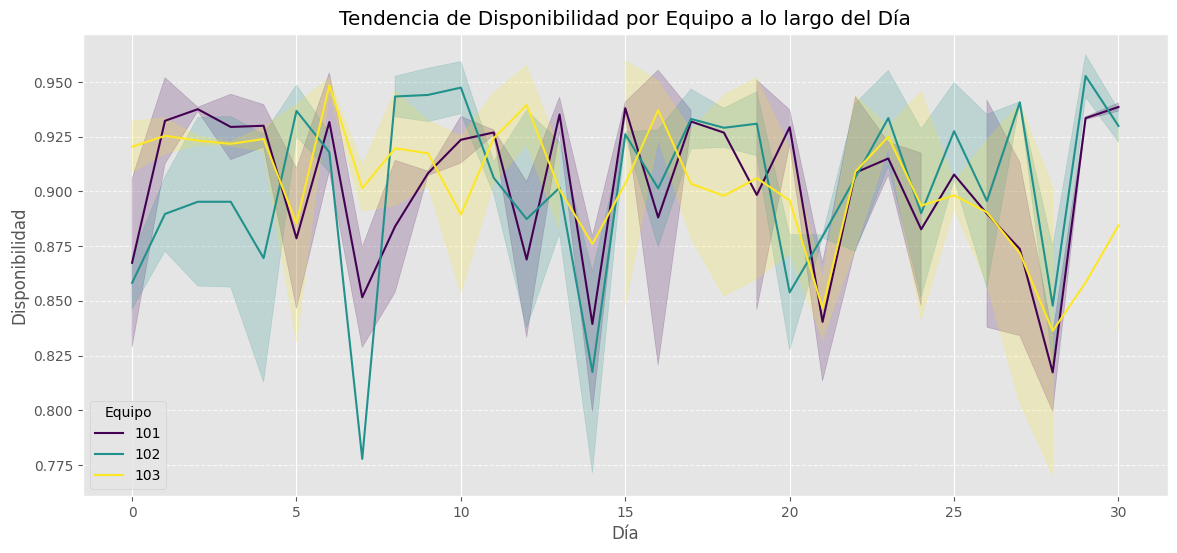

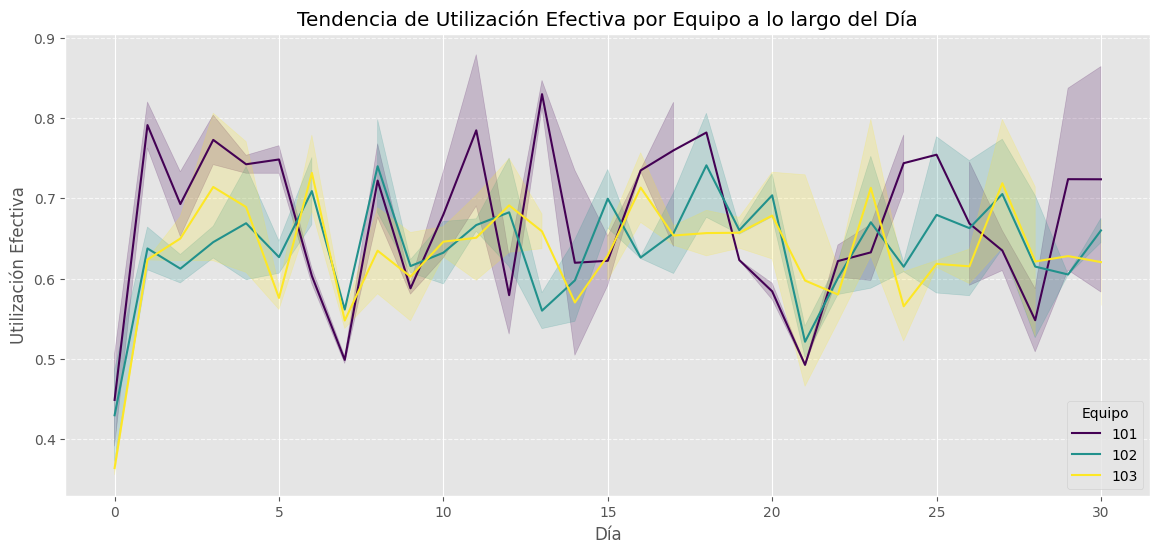


Generating line plots for KPIs over Dia, differentiated by Turno (subplots by Equipo):


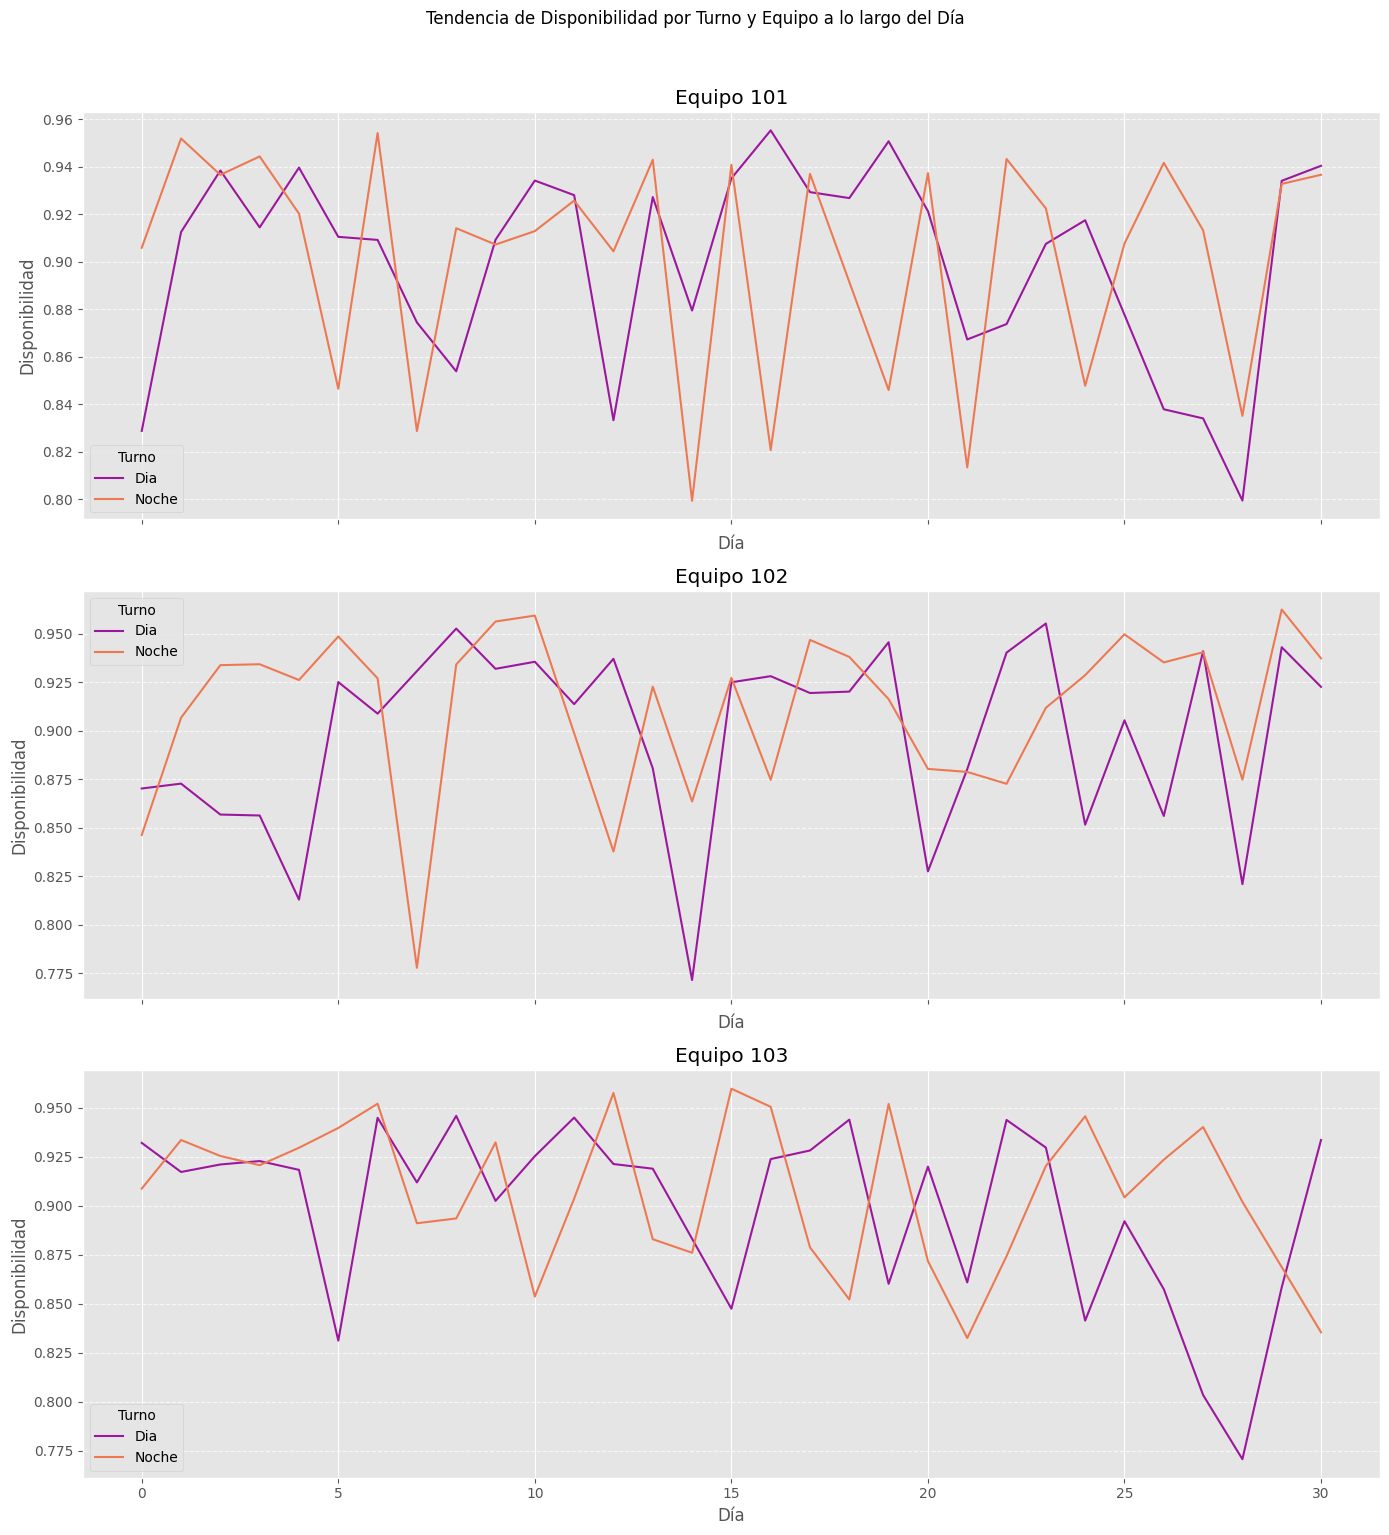

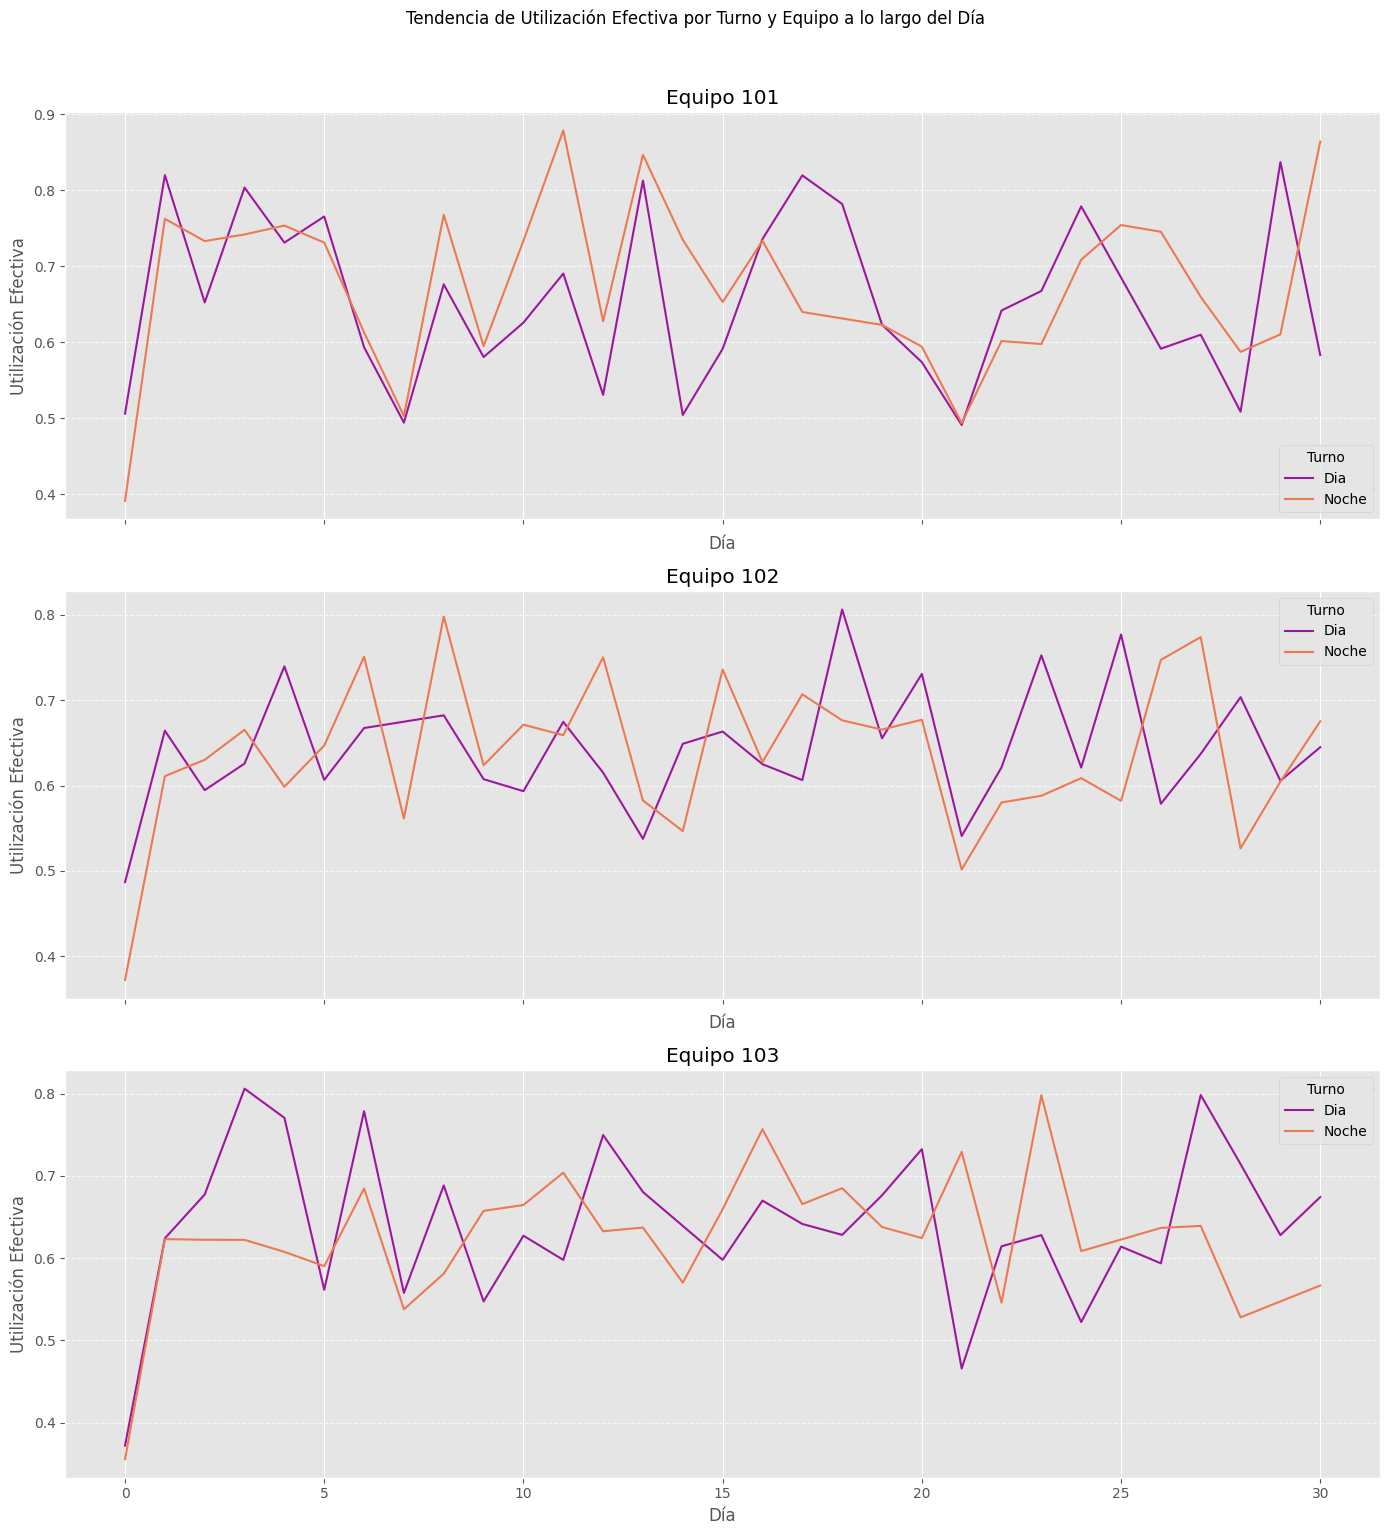

In [ ]:
# 1. and 2. Trend of KPIs over Dia, differentiated by Equipo
print("Generating line plots for KPIs over Dia, differentiated by Equipo:")
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_CAEX_capped, x='Dia', y='Disponibilidad', hue='Equipo', palette='viridis')
plt.title('Tendencia de Disponibilidad por Equipo a lo largo del Día')
plt.xlabel('Día')
plt.ylabel('Disponibilidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_CAEX_capped, x='Dia', y='Utilizacion_Efectiva', hue='Equipo', palette='viridis')
plt.title('Tendencia de Utilización Efectiva por Equipo a lo largo del Día')
plt.xlabel('Día')
plt.ylabel('Utilización Efectiva')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Trend of KPIs over Dia, differentiated by Turno (using subplots for each Equipo)
print("\nGenerating line plots for KPIs over Dia, differentiated by Turno (subplots by Equipo):")

# Get unique Equipo values
equipos = df_CAEX_capped['Equipo'].unique()

# Plot Disponibilidad by Turno for each Equipo
fig, axes = plt.subplots(nrows=len(equipos), figsize=(14, len(equipos) * 5))
fig.suptitle('Tendencia de Disponibilidad por Turno y Equipo a lo largo del Día', y=1.02)

for i, equipo in enumerate(equipos):
    sns.lineplot(data=df_CAEX_capped[df_CAEX_capped['Equipo'] == equipo], x='Dia', y='Disponibilidad', hue='Turno', ax=axes[i], palette='plasma')
    axes[i].set_title(f'Equipo {equipo}')
    axes[i].set_xlabel('Día')
    axes[i].set_ylabel('Disponibilidad')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i < len(equipos) - 1:
        axes[i].set_xticklabels([]) # Hide x-axis labels for all but the last subplot

plt.tight_layout()
plt.show()

# Plot Utilizacion_Efectiva by Turno for each Equipo
fig, axes = plt.subplots(nrows=len(equipos), figsize=(14, len(equipos) * 5))
fig.suptitle('Tendencia de Utilización Efectiva por Turno y Equipo a lo largo del Día', y=1.02)

for i, equipo in enumerate(equipos):
    sns.lineplot(data=df_CAEX_capped[df_CAEX_capped['Equipo'] == equipo], x='Dia', y='Utilizacion_Efectiva', hue='Turno', ax=axes[i], palette='plasma')
    axes[i].set_title(f'Equipo {equipo}')
    axes[i].set_xlabel('Día')
    axes[i].set_ylabel('Utilización Efectiva')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i < len(equipos) - 1:
        axes[i].set_xticklabels([]) # Hide x-axis labels for all but the last subplot

plt.tight_layout()
plt.show()

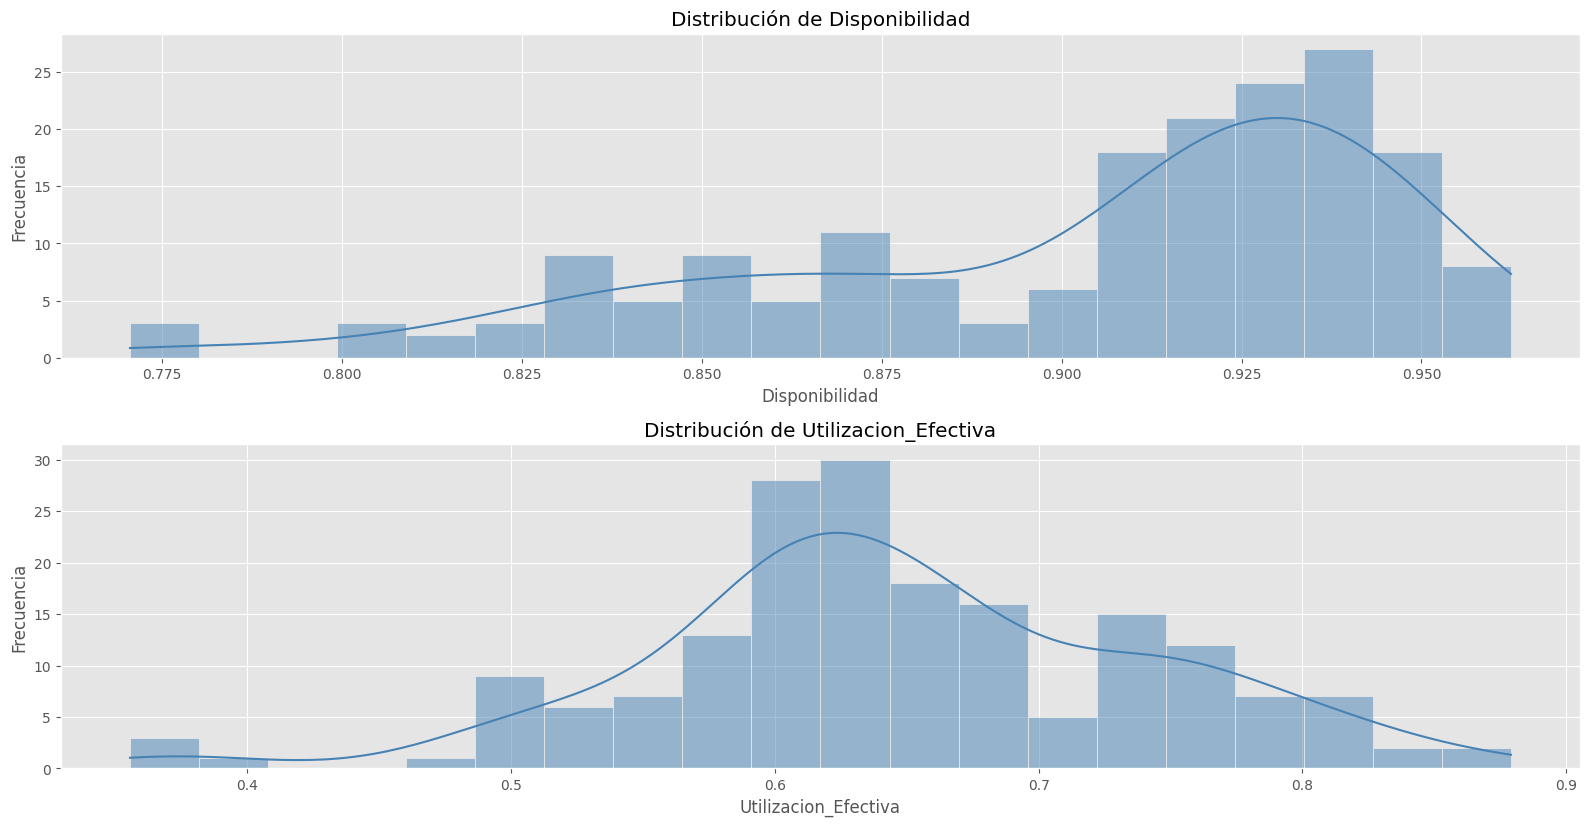

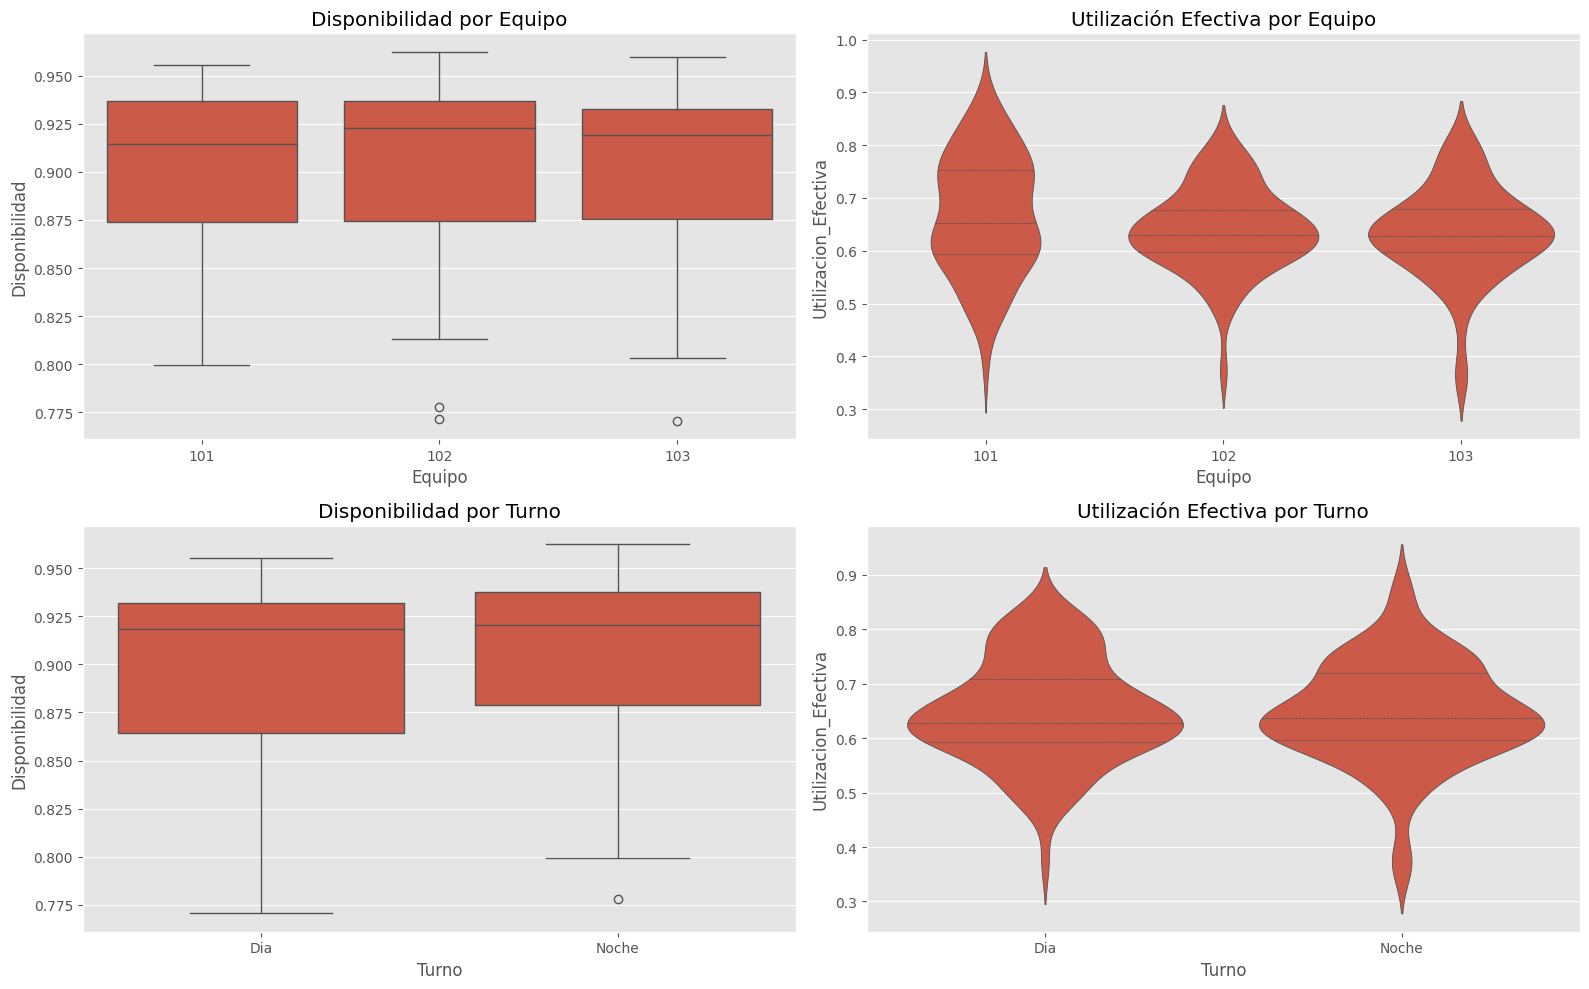

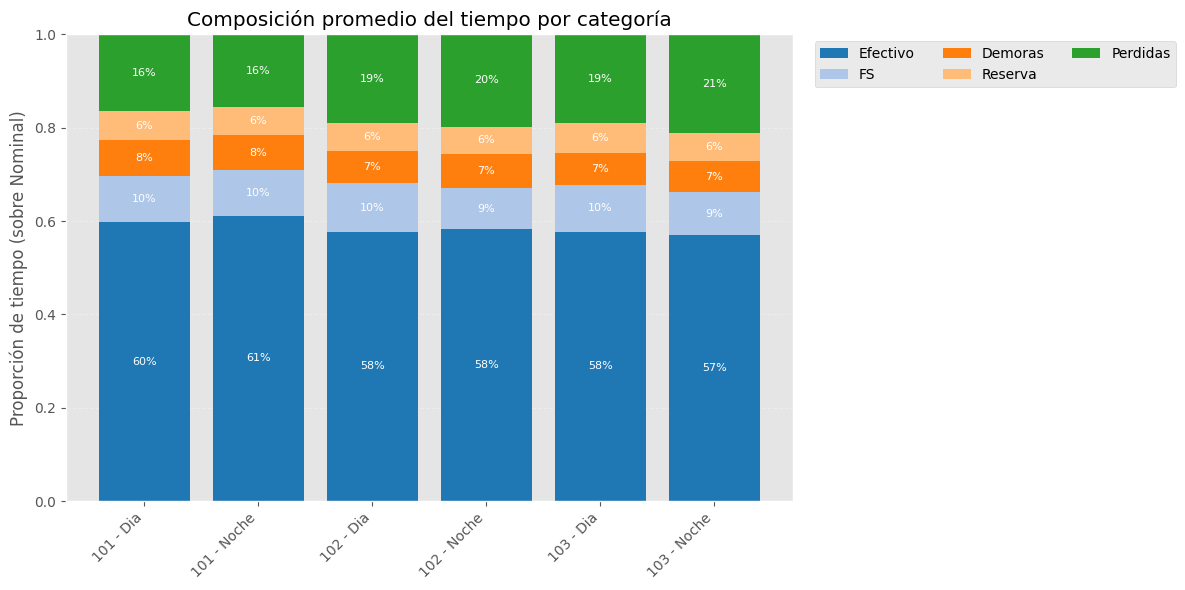

Resumen por Equipo/Turno (medias, medianas, IQR y % bajo umbral):


In [ ]:
# Visualizaciones avanzadas para caracterizar KPIs (usando df_CAEX_capped en lugar de df_CAEX)
# Elegir base
if 'df_CAEX_capped' not in globals():
    raise NameError("df_CAEX_capped no existe todavía. Ejecuta primero la celda donde se crea.")
base = df_CAEX_capped

# a) Distribuciones de KPIs
kpis = ['Disponibilidad', 'Utilizacion_Efectiva', 'OEE_proxy']
plt.figure(figsize=(16, 4*len(kpis)))
for i, k in enumerate(kpis, 1):
    if k not in base.columns:
        continue
    plt.subplot(len(kpis), 1, i)
    sns.histplot(base[k].dropna(), kde=True, bins=20, color='steelblue')
    plt.title(f'Distribución de {k}')
    plt.xlabel(k)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# b) Box/Violin por categorías (Equipo y Turno)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(data=base, x='Equipo', y='Disponibilidad', ax=axes[0,0])
axes[0,0].set_title('Disponibilidad por Equipo')

sns.violinplot(data=base, x='Equipo', y='Utilizacion_Efectiva', inner='quartile', ax=axes[0,1])
axes[0,1].set_title('Utilización Efectiva por Equipo')

if 'Turno' in base.columns:
    sns.boxplot(data=base, x='Turno', y='Disponibilidad', ax=axes[1,0])
    axes[1,0].set_title('Disponibilidad por Turno')
    sns.violinplot(data=base, x='Turno', y='Utilizacion_Efectiva', inner='quartile', ax=axes[1,1])
    axes[1,1].set_title('Utilización Efectiva por Turno')
else:
    axes[1,0].remove(); axes[1,1].remove()

plt.tight_layout()
plt.show()

# e) Composición de tiempos (barras apiladas por Equipo/Turno)
comp_cols = ['Efectivo','FS','Demoras','Reserva','Perdidas']
faltan = [c for c in comp_cols if c not in base.columns]
if faltan:
    raise ValueError(f"Faltan columnas para composición: {faltan}")

if 'Nominal' not in base.columns:
    base['Nominal'] = base[comp_cols].sum(axis=1)

for c in comp_cols:
    base[f'prop_{c}'] = np.where(base['Nominal'] > 0, base[c] / base['Nominal'], np.nan)

dims = ['Equipo'] + (['Turno'] if 'Turno' in base.columns else [])
comp_mean = base.groupby(dims, dropna=False)[[f'prop_{c}' for c in comp_cols]].mean().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(comp_mean))
colors = dict(zip(comp_cols, sns.color_palette('tab20', n_colors=len(comp_cols))))
for c in comp_cols:
    vals = comp_mean[f'prop_{c}'].fillna(0).values
    bars = ax.bar(range(len(comp_mean)), vals, bottom=bottom, label=c, color=colors[c])
    # Etiquetas internas (>5%)
    for bar, v in zip(bars, vals):
        if v > 0.05:
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_y()+v/2, f"{v:.0%}",
                    ha='center', va='center', color='white', fontsize=8)
    bottom += vals

if len(dims) == 1:
    xtlbl = comp_mean[dims[0]].astype(str)
else:
    xtlbl = comp_mean[dims].astype(str).agg(' - '.join, axis=1)

ax.set_xticks(range(len(comp_mean)))
ax.set_xticklabels(xtlbl, rotation=45, ha='right')
ax.set_ylabel('Proporción de tiempo (sobre Nominal)')
ax.set_title('Composición promedio del tiempo por categoría')
ax.set_ylim(0, 1)
ax.legend(ncol=3, bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# (Opcional) Recalcular summary si no existe (usa base)
if 'summary' not in globals():
    disp_thr = 0.85
    ue_thr = 0.60
    def iqr(s): return s.quantile(0.75) - s.quantile(0.25)
    grp = base.groupby(dims, dropna=False)
    summary = pd.DataFrame({
        'Disp_mean': grp['Disponibilidad'].mean(),
        'Disp_median': grp['Disponibilidad'].median(),
        'Disp_IQR': grp['Disponibilidad'].apply(iqr),
        'Disp_low_rate': grp['Disponibilidad'].apply(lambda s: (s < disp_thr).mean()),
        'UE_mean': grp['Utilizacion_Efectiva'].mean(),
        'UE_median': grp['Utilizacion_Efectiva'].median(),
        'UE_IQR': grp['Utilizacion_Efectiva'].apply(iqr),
        'UE_low_rate': grp['Utilizacion_Efectiva'].apply(lambda s: (s < ue_thr).mean()),
        'OEE_mean': grp['OEE_proxy'].mean() if 'OEE_proxy' in base.columns else np.nan
    }).reset_index()

print("Resumen por Equipo/Turno (medias, medianas, IQR y % bajo umbral):")
display(
    summary.style.format({
        'Disp_mean':'{:.2%}','Disp_median':'{:.2%}','Disp_IQR':'{:.2f}',
        'Disp_low_rate':'{:.1%}','UE_mean':'{:.2%}','UE_median':'{:.2%}',
        'UE_IQR':'{:.2f}','UE_low_rate':'{:.1%}','OEE_mean':'{:.2%}'
    })
)

# 3 Estudio exploratorio de datos disponibles incluyendo las variables antes calculadas.

Generando histogramas para variables numéricas:


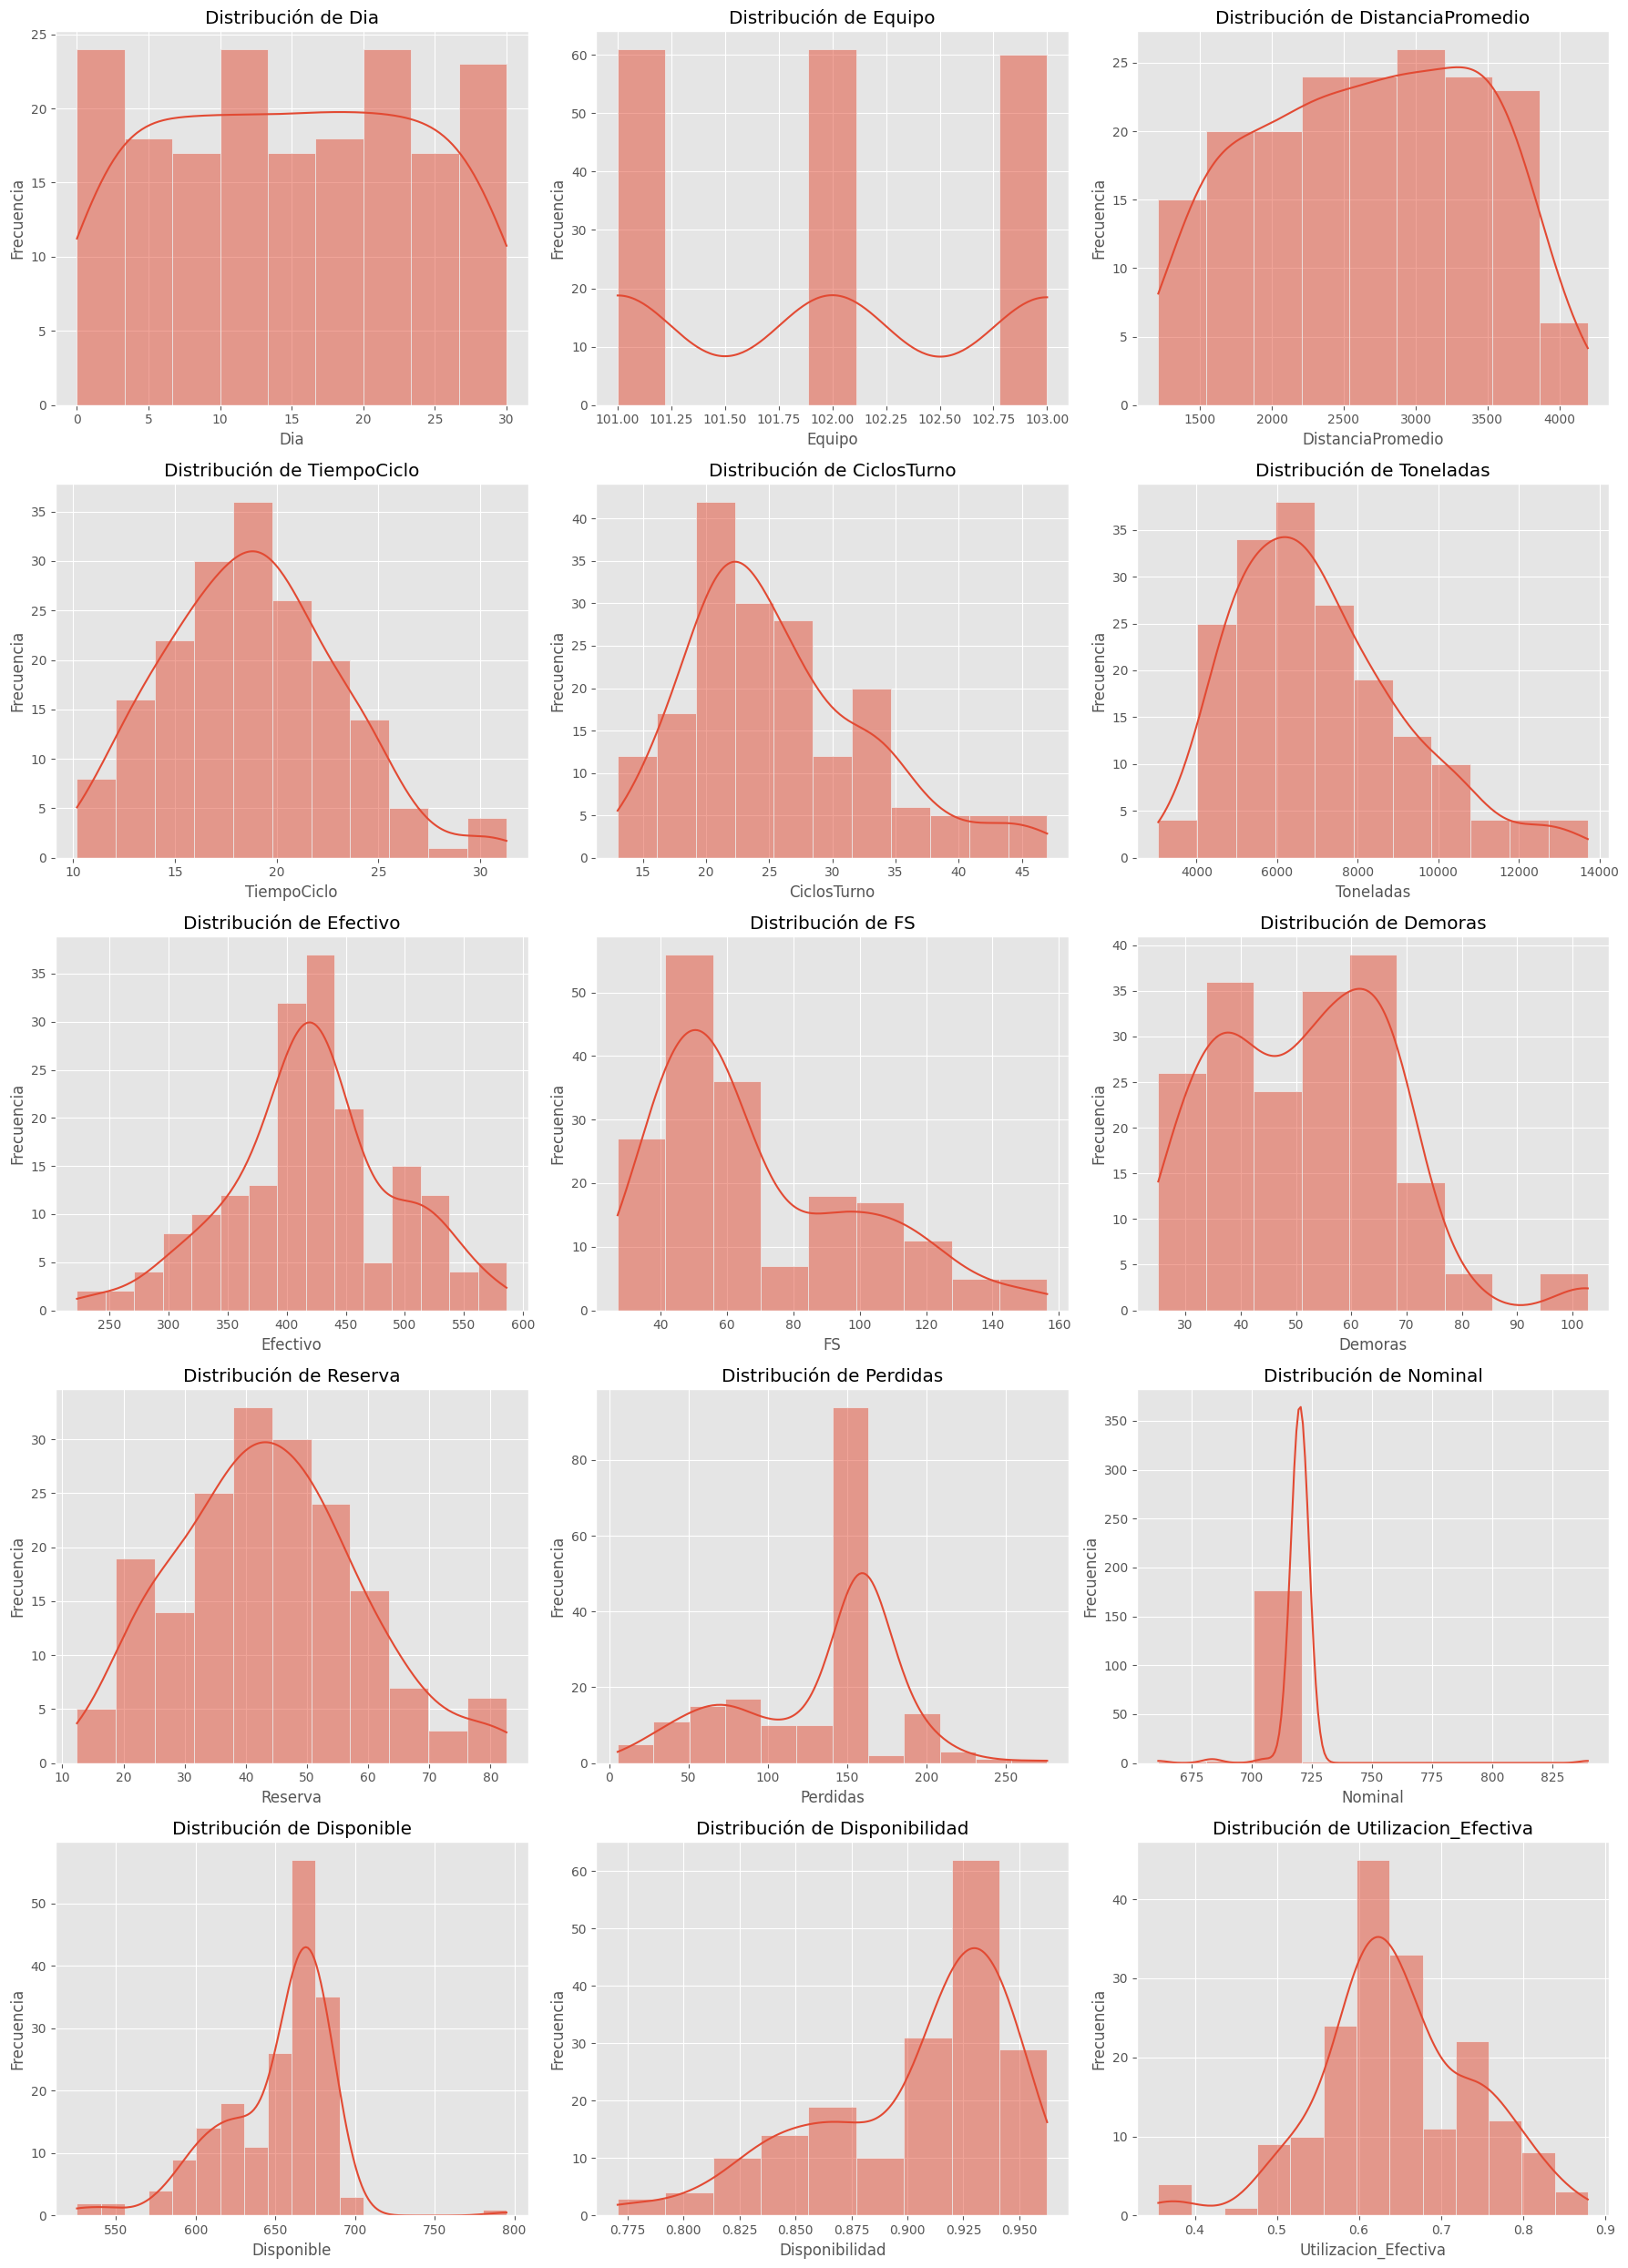

In [ ]:
# --- Estudio Exploratorio de Datos ---

# 3.1 Visualización de distribuciones de variables numéricas

print("Generando histogramas para variables numéricas:")

# Seleccionar solo las columnas numéricas
numeric_cols = df_CAEX_capped.select_dtypes(include=np.number).columns.tolist()

# Ajustar el tamaño de la figura en base al número de plots para evitar superposición
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3 # Organizar en filas de 3

plt.figure(figsize=(18, n_rows * 5)) # Ajustar tamaño de figura según el número de filas

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, 3, i + 1) # Crear subplots
    sns.histplot(data=df_CAEX_capped, x=col, kde=True) # Usar seaborn histplot con KDE para estimación de densidad
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout() # Ajustar diseño para prevenir superposición de títulos/etiquetas
plt.show()

Generando boxplots para variables numéricas:


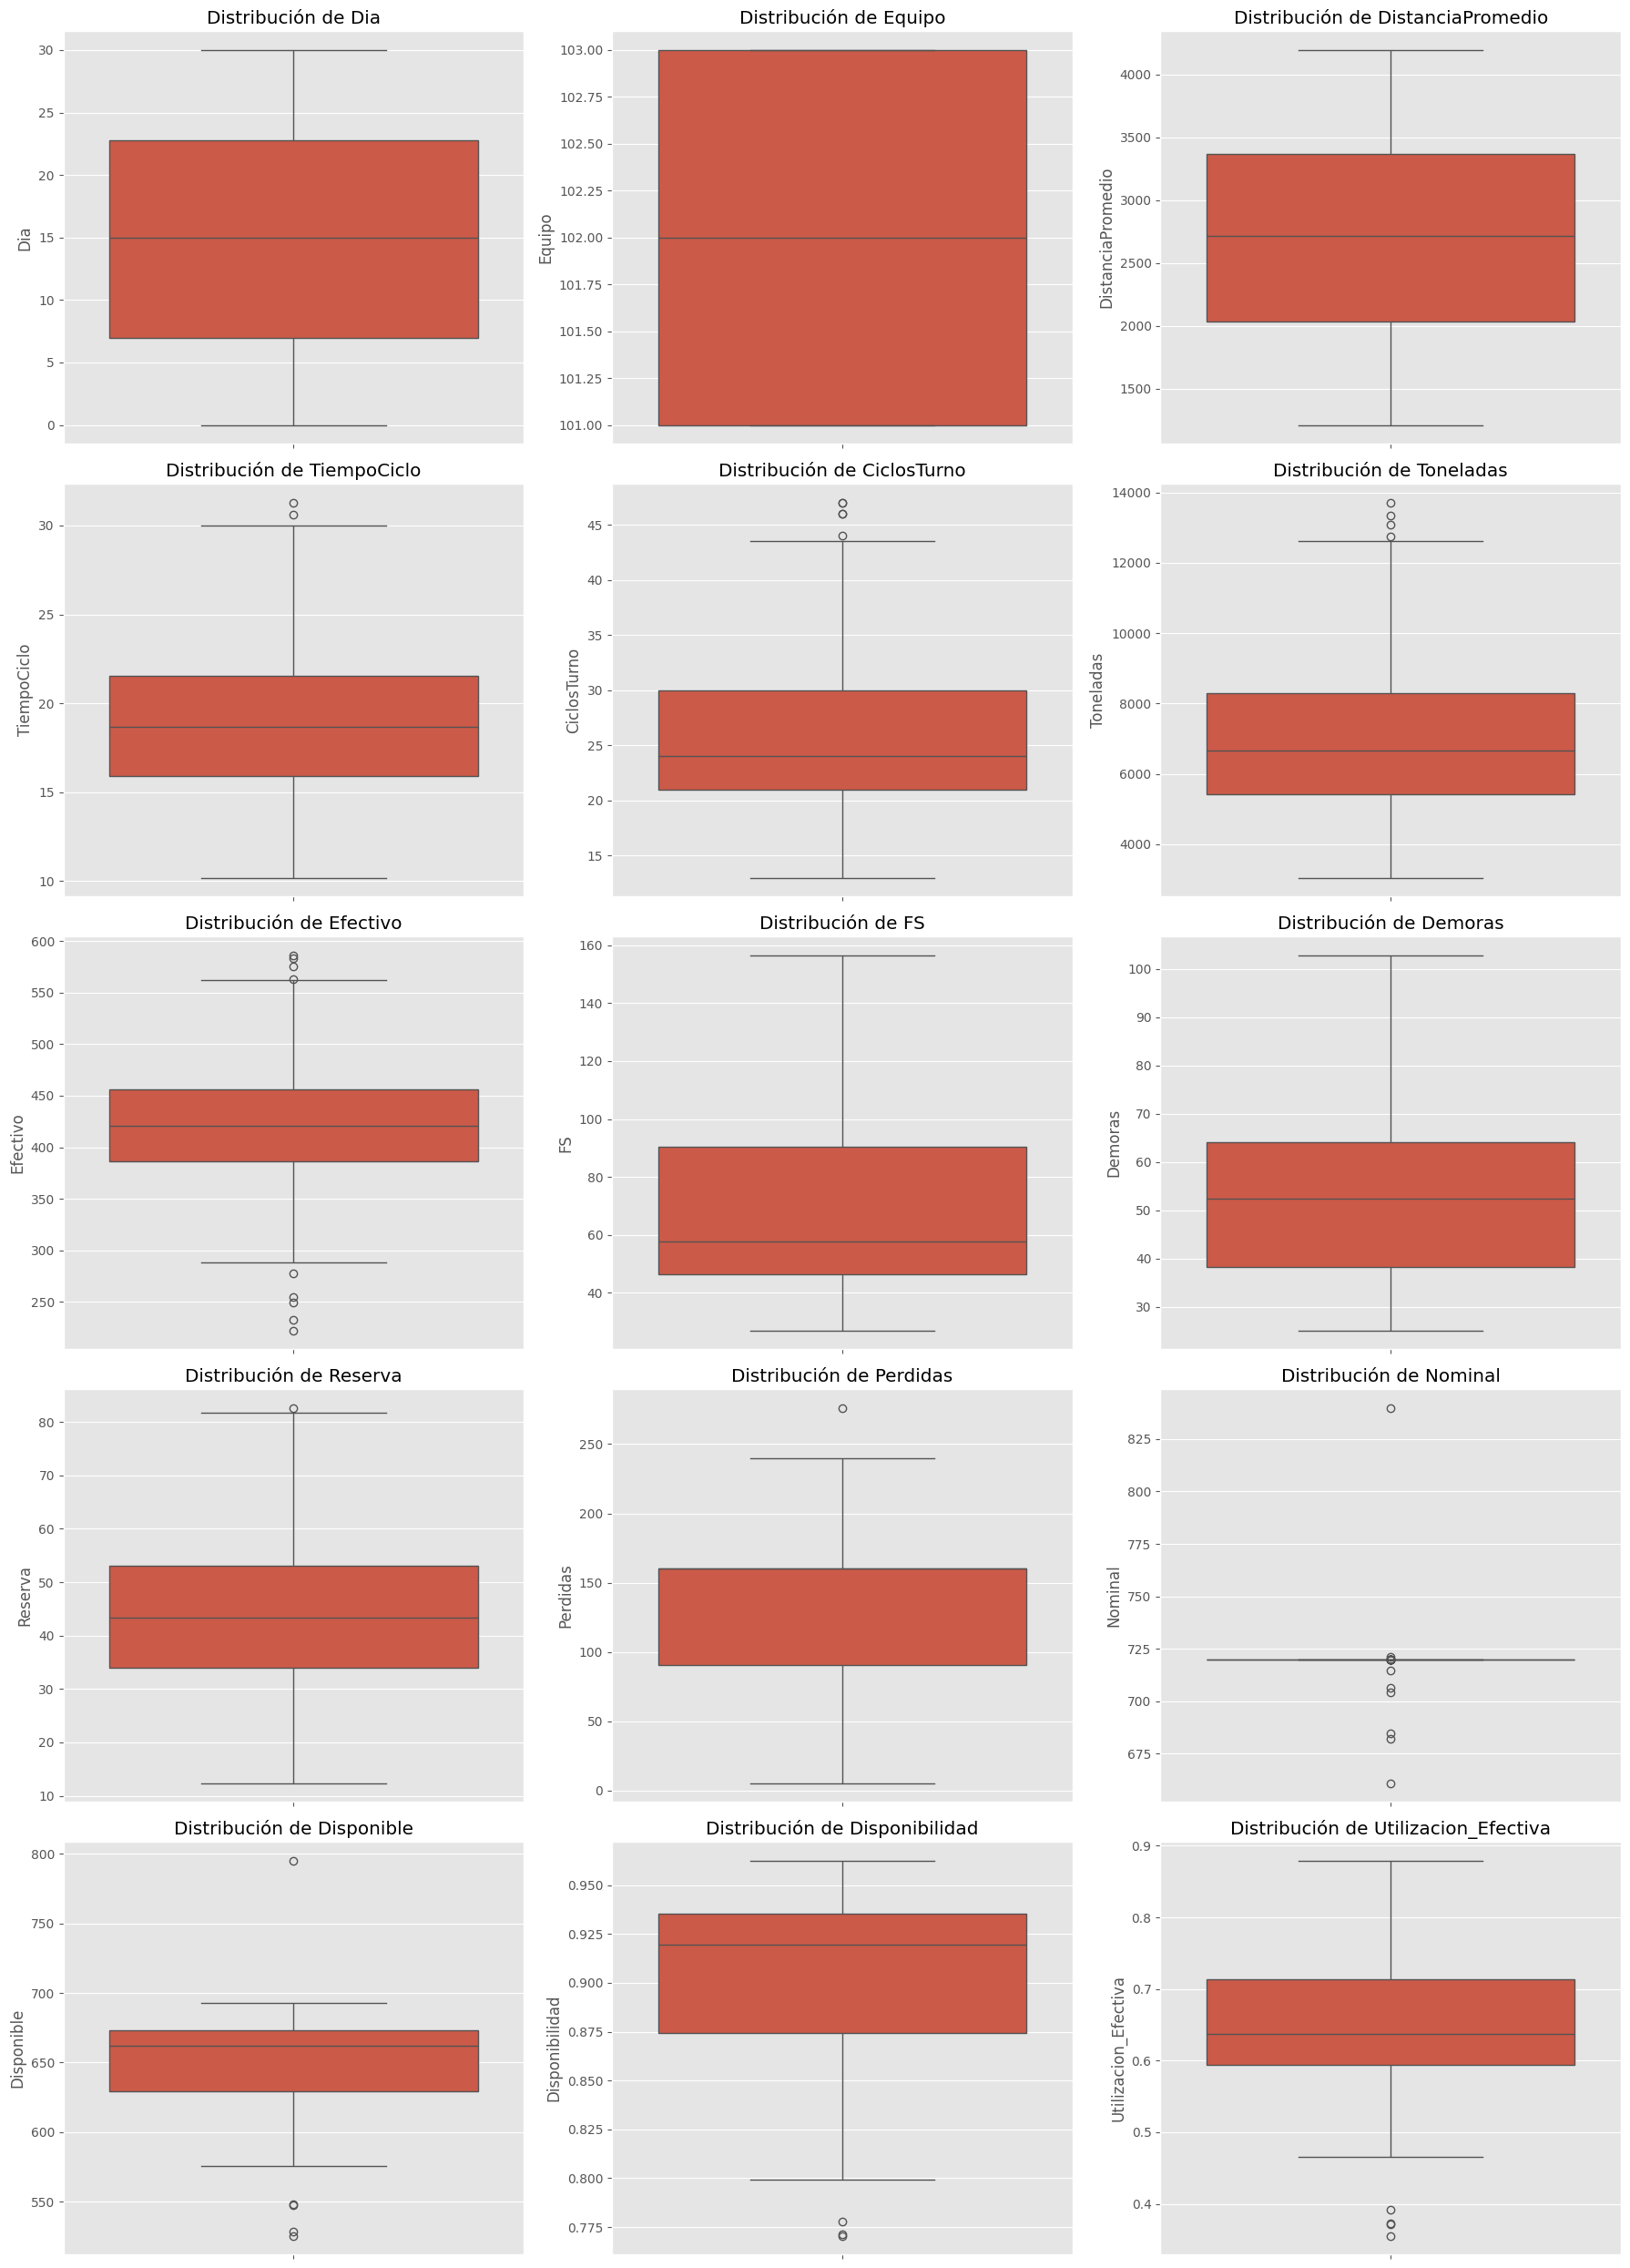


Generando gráficos para variables categóricas:


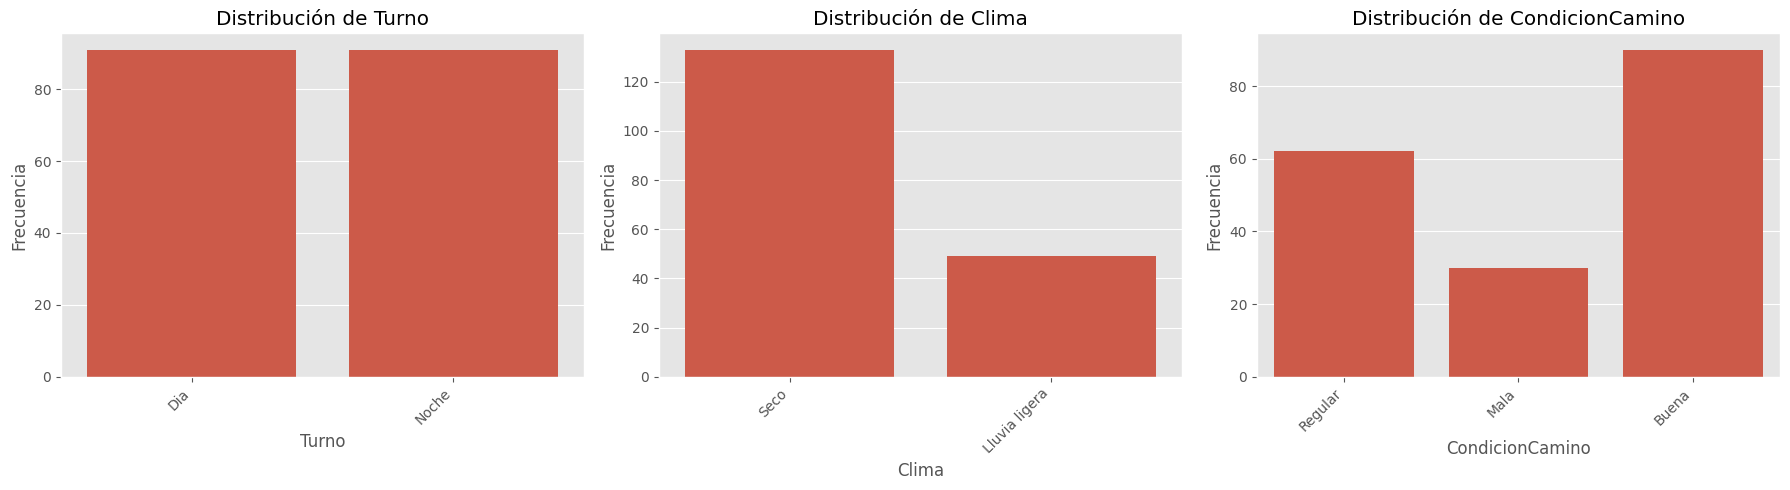

In [ ]:
# Boxplots para variables numéricas
print("Generando boxplots para variables numéricas:")

# Seleccionar solo las columnas numéricas
numeric_cols = df_CAEX_capped.select_dtypes(include=np.number).columns.tolist()

# Excluir columnas que son identificadores si se desea, pero para una vista completa las incluiremos
# Si quisieras excluirlas, podrías usar: [col for col in numeric_cols if col not in ['Dia', 'Equipo']]

# Ajustar el tamaño de la figura en base al número de plots para evitar superposición
n_cols_num = len(numeric_cols)
n_rows_num = (n_cols_num + 2) // 3 # Organizar en filas de 3

plt.figure(figsize=(18, n_rows_num * 5)) # Ajustar tamaño de figura según el número de filas

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows_num, 3, i + 1) # Crear subplots
    sns.boxplot(data=df_CAEX_capped, y=col) # Usar seaborn boxplot
    plt.title(f'Distribución de {col}')
    plt.ylabel(col)
    plt.xlabel('') # No label needed on x-axis for single boxplot

plt.tight_layout() # Ajustar diseño para prevenir superposición de títulos/etiquetas
plt.show()

# Boxplots (o countplots para distribución) para variables categóricas
print("\nGenerando gráficos para variables categóricas:")

# Seleccionar solo las columnas categóricas (object o category dtype)
categorical_cols = df_CAEX_capped.select_dtypes(include=['object', 'category']).columns.tolist()

# Ajustar el tamaño de la figura
n_cols_cat = len(categorical_cols)
plt.figure(figsize=(n_cols_cat * 6, 5)) # Ajustar tamaño de figura

for i, col in enumerate(categorical_cols):
    plt.subplot(1, n_cols_cat, i + 1) # Crear subplots
    sns.countplot(data=df_CAEX_capped, x=col) # Usar seaborn countplot para distribución
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad

plt.tight_layout() # Ajustar diseño
plt.show()

Generating scatter plots for Disponibilidad vs numeric variables:


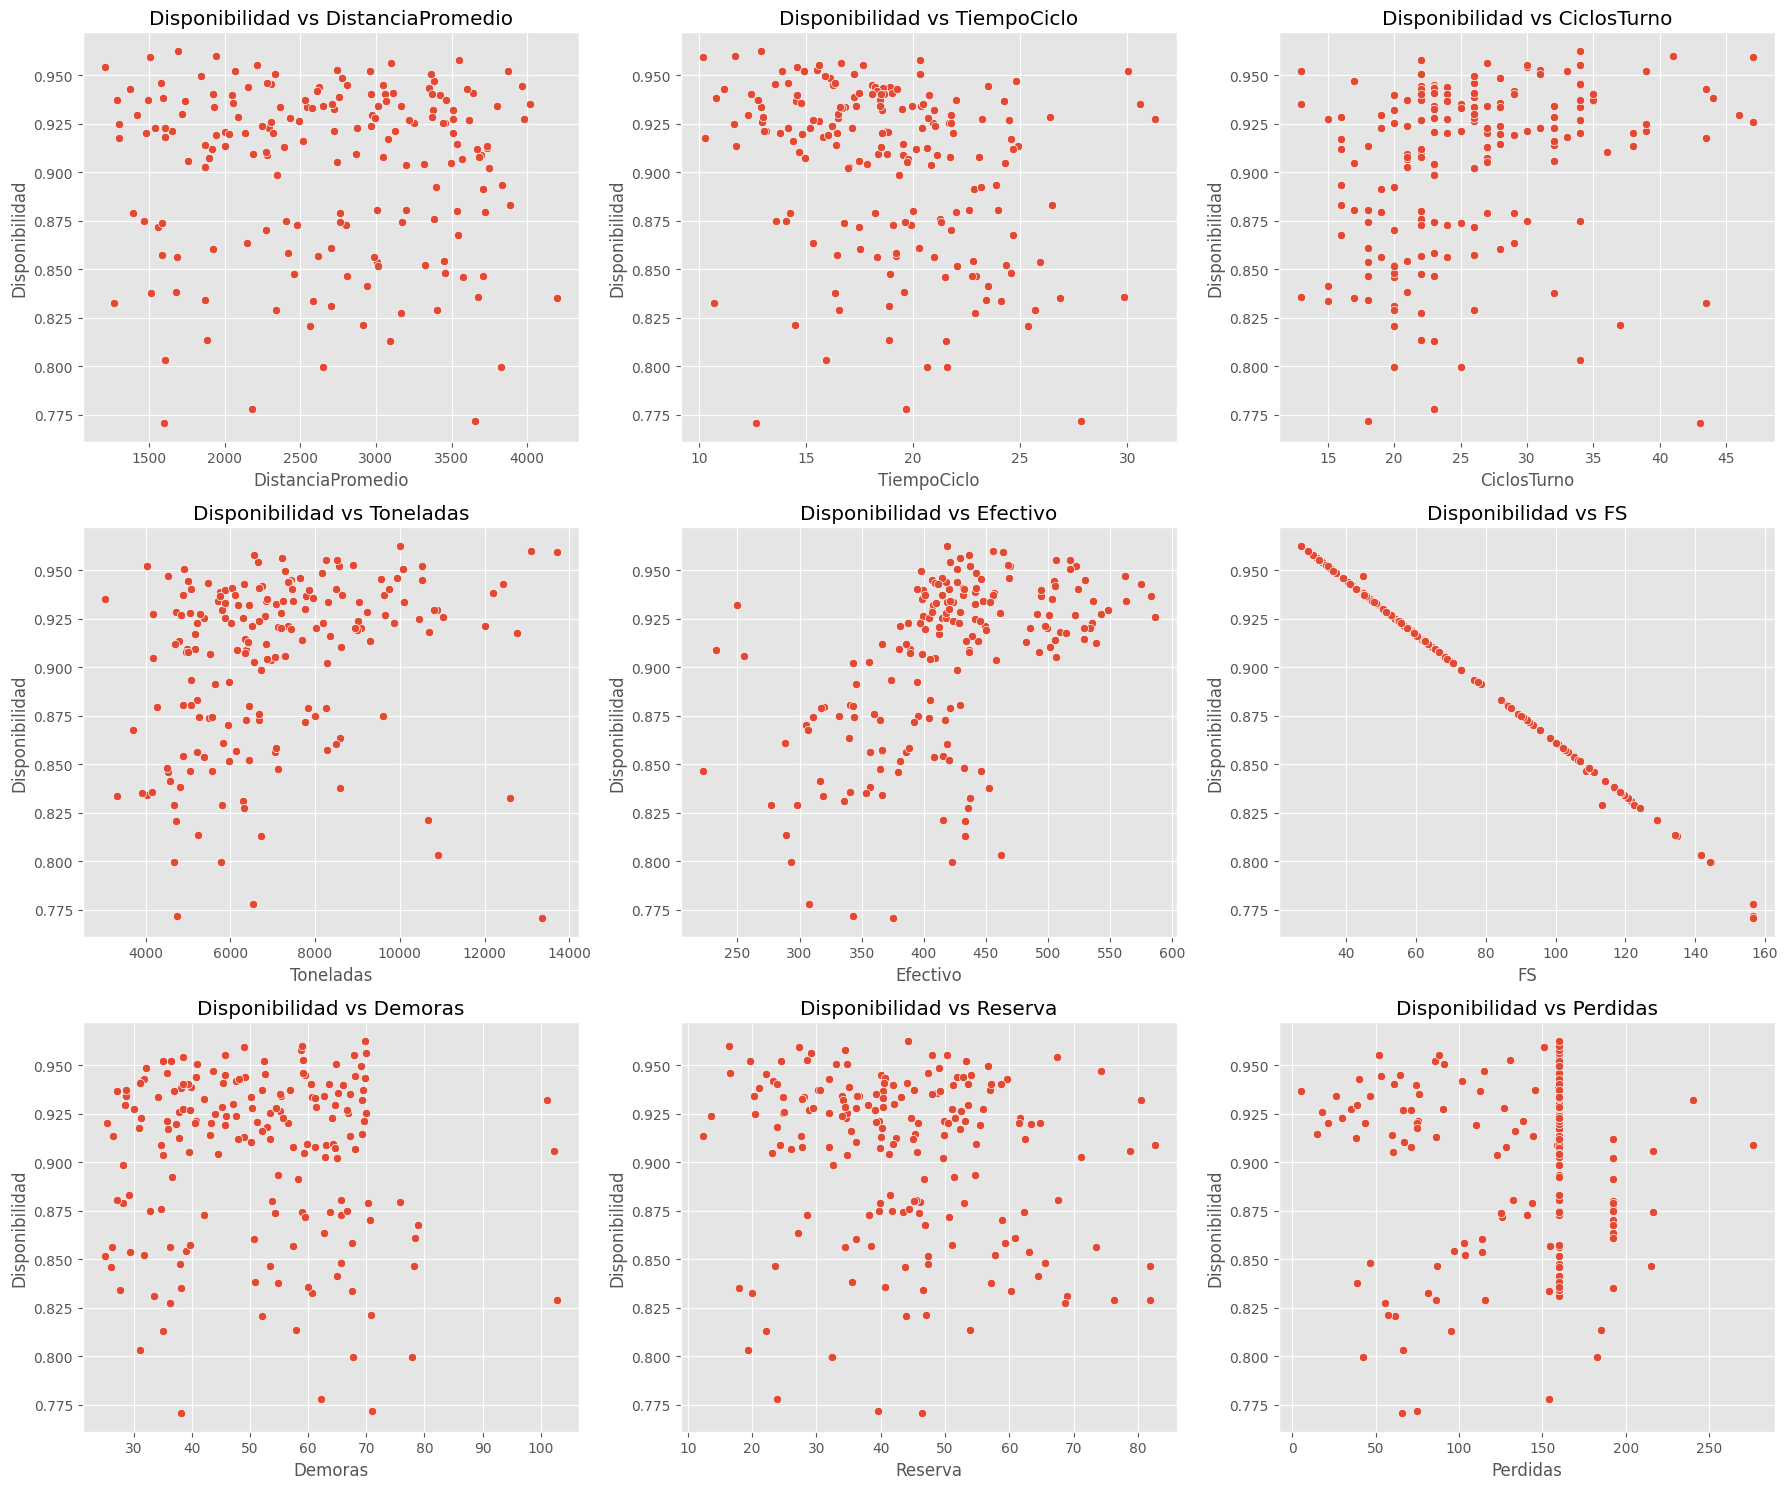


Generating scatter plots for Utilizacion_Efectiva vs numeric variables:


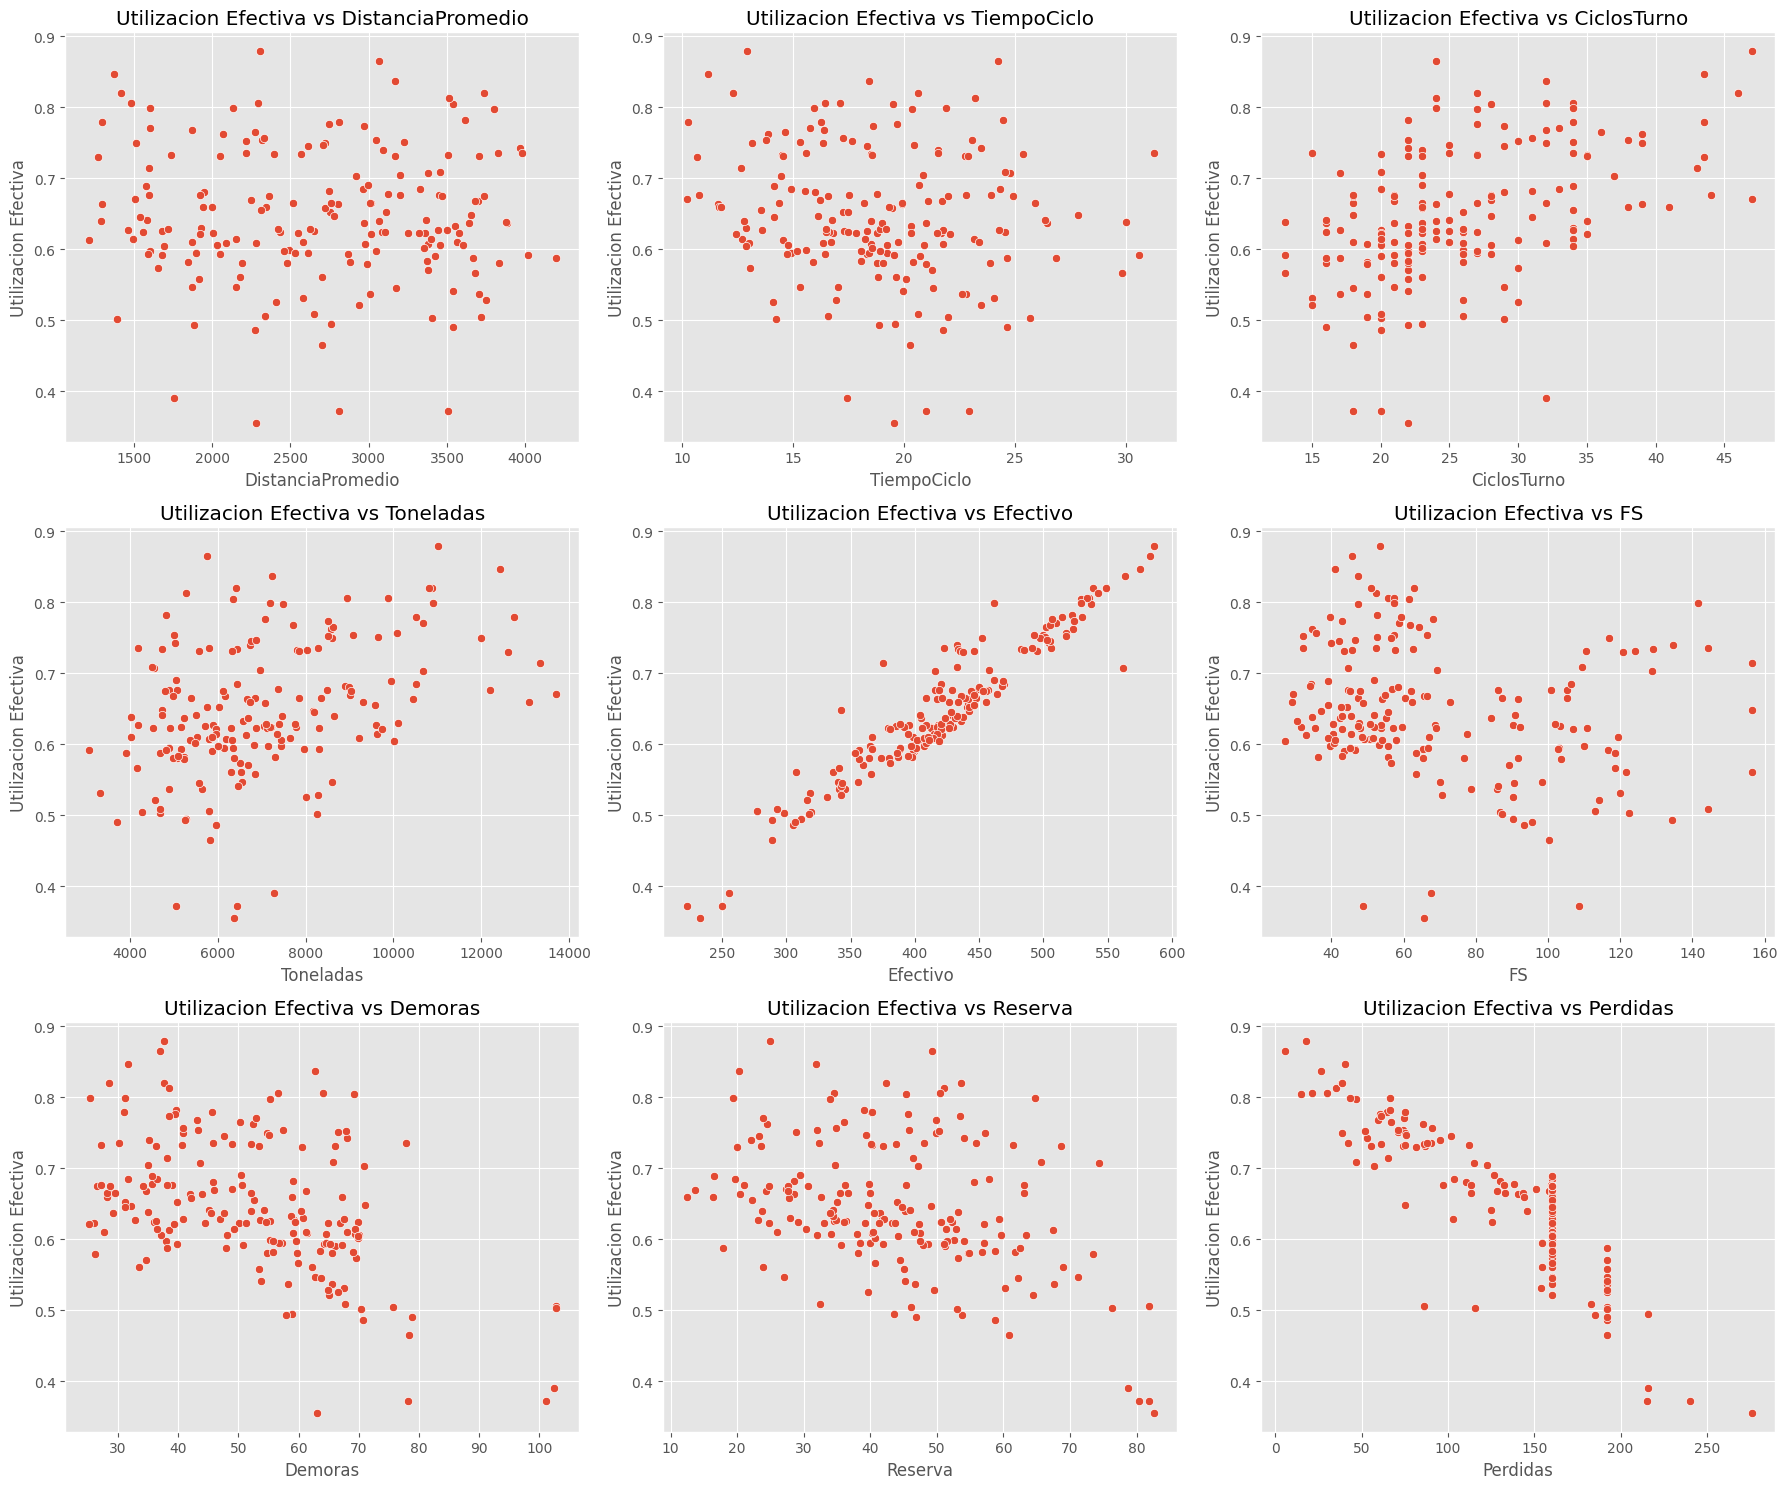

In [ ]:
# Numeric variables for scatter plots
numeric_vars = ['DistanciaPromedio', 'TiempoCiclo', 'CiclosTurno', 'Toneladas', 'Efectivo', 'FS', 'Demoras', 'Reserva', 'Perdidas']
kpi_vars = ['Disponibilidad', 'Utilizacion_Efectiva']

# Scatter plots for Disponibilidad vs numeric variables
print("Generating scatter plots for Disponibilidad vs numeric variables:")
n_cols_num = len(numeric_vars)
n_rows_num = (n_cols_num + 2) // 3 # Arrange in rows of 3

plt.figure(figsize=(18, n_rows_num * 5))

for i, col in enumerate(numeric_vars):
    plt.subplot(n_rows_num, 3, i + 1)
    sns.scatterplot(data=df_CAEX_capped, x=col, y='Disponibilidad')
    plt.title(f'Disponibilidad vs {col}')
    plt.xlabel(col)
    plt.ylabel('Disponibilidad')

plt.tight_layout()
plt.show()

# Scatter plots for Utilizacion_Efectiva vs numeric variables
print("\nGenerating scatter plots for Utilizacion_Efectiva vs numeric variables:")
plt.figure(figsize=(18, n_rows_num * 5))

for i, col in enumerate(numeric_vars):
    plt.subplot(n_rows_num, 3, i + 1)
    sns.scatterplot(data=df_CAEX_capped, x=col, y='Utilizacion_Efectiva')
    plt.title(f'Utilizacion Efectiva vs {col}')
    plt.xlabel(col)
    plt.ylabel('Utilizacion Efectiva')

plt.tight_layout()
plt.show()

Dado quese tienen variables categoricas correspondientes a "Equipo","Turno", "Clima", "CondicionCamino" se van a convertir en columnas numericas mediante `One Hot Encoding`

In [ ]:
# 1) Copia
df_encoded = df_CAEX_capped.copy()

# 2) Dummies (elige las que existan realmente en tu DF)
cand_cat = ["Equipo","Turno", "Clima", "CondicionCamino"]
cat_cols = [c for c in cand_cat if c in df_encoded.columns]

#3) Pasar a dummies
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, dtype=np.int64)

print("DataFrame after correcting column name and applying one-hot encoding:")
display(df_encoded.head())

DataFrame after correcting column name and applying one-hot encoding:


Dia  DistanciaPromedio  TiempoCiclo  CiclosTurno  Toneladas  Efectivo  \
0    0               2340        16.56         26.0     5802.8   277.324   
1    0               1756        17.45         32.0     7281.8   255.208   
2    0               2274        21.75         20.0     5947.6   305.064   
3    0               2807        22.92         18.0     5052.5   222.496   
4    0               3507        20.98         20.0     6443.3   249.660   

        FS  Demoras  Reserva  Perdidas  ...  Equipo_101  Equipo_102  \
0  113.156   102.76     81.8     86.04  ...           1           0   
1   67.732   102.36     78.7    216.00  ...           1           0   
2   93.456    70.68     58.8    192.00  ...           0           1   
3  108.604    78.24     81.8    215.16  ...           0           1   
4   48.900   101.04     80.4    240.00  ...           0           0   

   Equipo_103  Turno_Dia  Turno_Noche  Clima_Lluvia ligera  Clima_Seco  \
0           0          1            0                    0           1   
1           0          0            1                    0           1   
2           0          1            0                    0           1   
3           0          0            1                    1           0   
4           1          1            0                    0           1   

   CondicionCamino_Buena  CondicionCamino_Mala  CondicionCamino_Regular  
0                      0                     0                        1  
1                      0                     1                        0  
2                      0                     0                        1  
3                      0                     1                        0  
4                      0                     0                        1  

[5 rows x 24 columns]

Dado que los rangos de las variables son distintos, vamos a escalar los datos con `MinMaxScaler()`

In [ ]:
mms = MinMaxScaler()
df_encoded_scaled = mms.fit_transform(df_encoded)
df_encoded_scaled = pd.DataFrame(df_encoded_scaled, columns = df_encoded.columns)
df_encoded_scaled.head()

Dia  DistanciaPromedio  TiempoCiclo  CiclosTurno  Toneladas  Efectivo  \
0  0.0           0.378224     0.301708     0.382353   0.258266  0.150849   
1  0.0           0.182580     0.343928     0.558824   0.397070  0.090001   
2  0.0           0.356114     0.547913     0.205882   0.271855  0.227170   
3  0.0           0.534673     0.603416     0.147059   0.187850  0.000000   
4  0.0           0.769179     0.511385     0.205882   0.318377  0.074736   

         FS   Demoras   Reserva  Perdidas  ...  Equipo_101  Equipo_102  \
0  0.665290  1.000000  0.988604  0.298004  ...         1.0         0.0   
1  0.314326  0.994849  0.944444  0.778271  ...         1.0         0.0   
2  0.513080  0.586917  0.660969  0.689579  ...         0.0         1.0   
3  0.630119  0.684265  0.988604  0.775166  ...         0.0         1.0   
4  0.168822  0.977852  0.968661  0.866962  ...         0.0         0.0   

   Equipo_103  Turno_Dia  Turno_Noche  Clima_Lluvia ligera  Clima_Seco  \
0         0.0        1.0          0.0                  0.0         1.0   
1         0.0        0.0          1.0                  0.0         1.0   
2         0.0        1.0          0.0                  0.0         1.0   
3         0.0        0.0          1.0                  1.0         0.0   
4         1.0        1.0          0.0                  0.0         1.0   

   CondicionCamino_Buena  CondicionCamino_Mala  CondicionCamino_Regular  
0                    0.0                   0.0                      1.0  
1                    0.0                   1.0                      0.0  
2                    0.0                   0.0                      1.0  
3                    0.0                   1.0                      0.0  
4                    0.0                   0.0                      1.0  

[5 rows x 24 columns]

Fijamos la semilla aleatorea

In [ ]:

np.random.seed(7004)
SEED=7004


# 4 Utilizar los métodos no supervisados kmeans y DBSCAN para identificar patrones operacionales entre los equipos.

## 4.1 Kmeans

In [ ]:

# --- 4.1 Construir matriz de features ---
# Usamos todas las columnas numéricas de la base, excluyendo identificadores. Con eso te aseguras que el clustering se haga solo sobre las variables numéricas operacionales y las dummies generadas, no sobre identificadores ni índices de tiempo.
DROP_COLS = "" # ajusta si tus datos tienen estas columnas
X = df_encoded_scaled.drop(columns=[c for c in DROP_COLS if c in df_encoded_scaled.columns]).to_numpy(dtype=float)


In [ ]:
# Guardamos los nombres de las columnas finales para saber qué features entraron al clustering
X_cols = [c for c in df_encoded_scaled.columns if c not in DROP_COLS]
print("Columnas incluidas en X:", X_cols[:24], "...")  # mostramos las primeras 20
print("Dimensiones de X:", X.shape)

Columnas incluidas en X: ['Dia', 'DistanciaPromedio', 'TiempoCiclo', 'CiclosTurno', 'Toneladas', 'Efectivo', 'FS', 'Demoras', 'Reserva', 'Perdidas', 'Nominal', 'Disponible', 'Disponibilidad', 'Utilizacion_Efectiva', 'Equipo_101', 'Equipo_102', 'Equipo_103', 'Turno_Dia', 'Turno_Noche', 'Clima_Lluvia ligera', 'Clima_Seco', 'CondicionCamino_Buena', 'CondicionCamino_Mala', 'CondicionCamino_Regular'] ...
Dimensiones de X: (182, 24)


### Selección de features para análisis operacional

Para identificar patrones operacionales entre los equipos, es importante escoger variables que
reflejen de manera directa el desempeño, la utilización y la eficiencia de la flota.

Las variables seleccionadas fueron:

- **Disponibilidad**: representa el porcentaje de tiempo en que el equipo estuvo operativo
  (no detenido por fallas o mantenciones). Es clave para diferenciar entre equipos con alta
  confiabilidad y aquellos con frecuentes paradas.

- **Utilización Efectiva**: mide cuánto del tiempo disponible realmente se ocupó en
  operación productiva. Permite identificar casos de subutilización, incluso en equipos con
  buena disponibilidad mecánica.

Estas dos variables juntas permiten diferenciar claramente entre:

- Equipos muy disponibles pero poco usados → subutilización.

- Equipos poco disponibles pero muy usados cuando están en línea → posibles problemas de confiabilidad.

- Equipos con alta disponibilidad y alta utilización → operación óptima.

En minería de operaciones, esos son patrones operacionales reales, por lo que sí tiene mucho sentido usarlos como features.

In [ ]:
feat_x, feat_y = "Disponibilidad", "Utilizacion_Efectiva"
X = df_encoded_scaled[[feat_x, feat_y]].to_numpy()
print(X)

[[0.30362919 0.28777928]
 [0.70548506 0.06840305]
 [0.51925768 0.25104325]
 [0.3943442  0.0321062 ]
 [0.84181822 0.0316478 ]
 [0.72005082 0.        ]
 [0.74003168 0.88736771]
 [0.94526983 0.77758665]
 [0.53233211 0.58963754]
 [0.70940884 0.48787407]
 [0.7643562  0.51318619]
 [0.84945583 0.51124825]
 [0.87508345 0.56730535]
 [0.86552738 0.72147439]
 [0.44925953 0.45666268]
 [0.85054174 0.52447539]
 [0.78430086 0.61494342]
 [0.80688791 0.50976965]
 [0.75020309 0.85619693]
 [0.90585107 0.73828659]
 [0.44676192 0.5160118 ]
 [0.85303935 0.59155661]
 [0.79338636 0.8607109 ]
 [0.7823824  0.50954422]
 [0.88134556 0.71775657]
 [0.78039156 0.76056382]
 [0.22081897 0.73336103]
 [0.81065242 0.46422114]
 [0.77000296 0.79304788]
 [0.82875102 0.48163697]
 [0.72946209 0.78348148]
 [0.39615823 0.71772806]
 [0.80515045 0.47968987]
 [0.92760559 0.55645876]
 [0.31554705 0.39351122]
 [0.88149035 0.44849471]
 [0.72272941 0.45466484]
 [0.95714251 0.49208407]
 [0.7203404  0.59553531]
 [0.81521327 0.75508349]


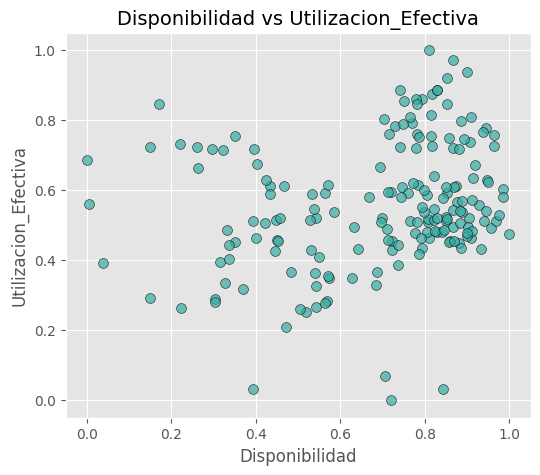

In [ ]:
def plot_some_clusters(x, y, xlabel, ylabel, title, centers=None, color="#36ADA4"):
    fig, ax = plt.subplots(figsize=(6, 5))
    points = ax.scatter(x, y, s=50, c=color, edgecolor='black', alpha=0.7)

    # Si hay centroides, los dibuja
    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker="*")

    # Si color son etiquetas (array), agrega leyenda
    if isinstance(color, np.ndarray):
        handles, _ = points.legend_elements()
        ax.legend(handles, np.unique(color), title='Clusters')

    # Etiquetas y título
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)



# --- Uso con tus features reales ---
feat_x, feat_y = "Disponibilidad", "Utilizacion_Efectiva"

fig = plot_some_clusters(
    df_encoded_scaled[feat_x].values,
    df_encoded_scaled[feat_y].values,  # ojo: aquí usabas df_encoded_scaled_2, probablemente era un typo
    xlabel=feat_x,
    ylabel=feat_y,
    title=f"{feat_x} vs {feat_y}",
    color="#36ADA4"
)

plt.show()     # mostramos explícitamente
plt.close(fig)   # cerramos después de mostrar, para evitar duplicados

In [ ]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto', random_state = SEED)
kmeans_pred = kmeans.fit_predict(X)

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[0.36055286, 0.57206841],
       [0.83712495, 0.52354396],
       [0.52725284, 0.28394508],
       [0.82496194, 0.80177569]])

In [ ]:
# -----------------------------------------
# 4.2 Barrido de K y diccionario results
# -----------------------------------------
range_n_clusters = [2, 3, 4, 5, 6]
results = {}

In [ ]:
for k in range_n_clusters:
    km = KMeans(n_clusters=k, n_init=10, random_state=SEED)
    labels = km.fit_predict(X)
    results[k] = {"labels": labels, "centers": km.cluster_centers_}

print("[INFO] KMeans entrenado para k en", range_n_clusters)

[INFO] KMeans entrenado para k en [2, 3, 4, 5, 6]


In [ ]:
def plot_kmeans_results(X, y_pred, centers, n_clusters, feat_x, feat_y):
    # Silhouette global y por muestra
    s_global = silhouette_score(X, y_pred)
    s_samples = silhouette_samples(X, y_pred)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    plt.suptitle(f"Silhouette analysis - KMeans con {n_clusters} clusters", fontsize=14, fontweight="bold")

    # Izq: silhouette por cluster
    ax1.set_title("Coeficientes silhouette por cluster")
    ax1.set_xlabel("Coeficiente silhouette")
    ax1.set_xlim([-0.2, 1.0])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax1.yaxis.set_visible(False)

    y_lower = 10
    for label in range(n_clusters):
        ith_s = np.sort(s_samples[y_pred == label])
        size = ith_s.shape[0]
        y_upper = y_lower + size
        color = cm.Spectral(float(label) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5*size, str(label))
        y_lower = y_upper + 10
    ax1.axvline(x=s_global, color="red", linestyle="--")

    # Der: scatter 2D
    ax2.set_title(f"{feat_x} vs {feat_y}\nSilhouette global={s_global:.3f}")
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors, alpha=0.7, edgecolor="k")
    ax2.scatter(centers[:,0], centers[:,1], c="red", s=200, marker="*")
    ax2.set_xlabel(feat_x); ax2.set_ylabel(feat_y)

    plt.show(); plt.close(fig)



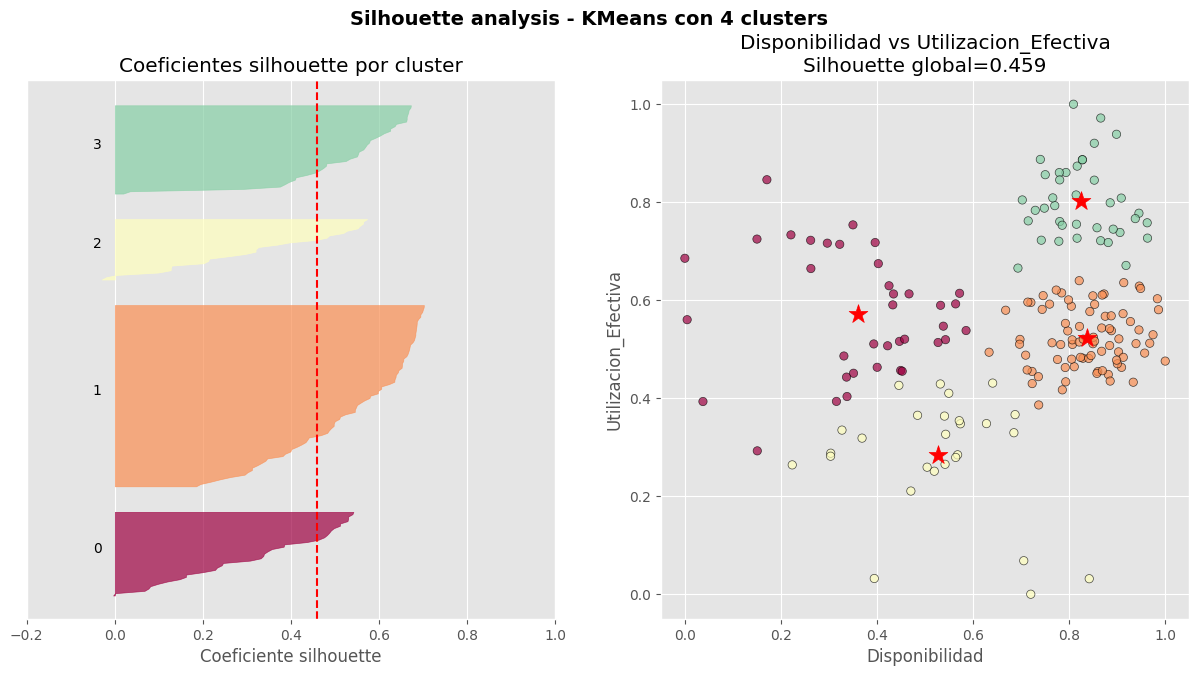

In [ ]:

# Ejemplo: graficar k=4 (ahora sí, results ya existe y la firma coincide)
k_to_plot = 4
plot_kmeans_results(X, results[k_to_plot]["labels"], results[k_to_plot]["centers"], k_to_plot, feat_x, feat_y)


**Sihouette Coefficient**: Evaluar que tan **compacto** (compactness) y **separados** (separation) están los clusters. Utilizando el método de *Sihouette Coefficient*, podemos encontrar el número óptimo de clusters.

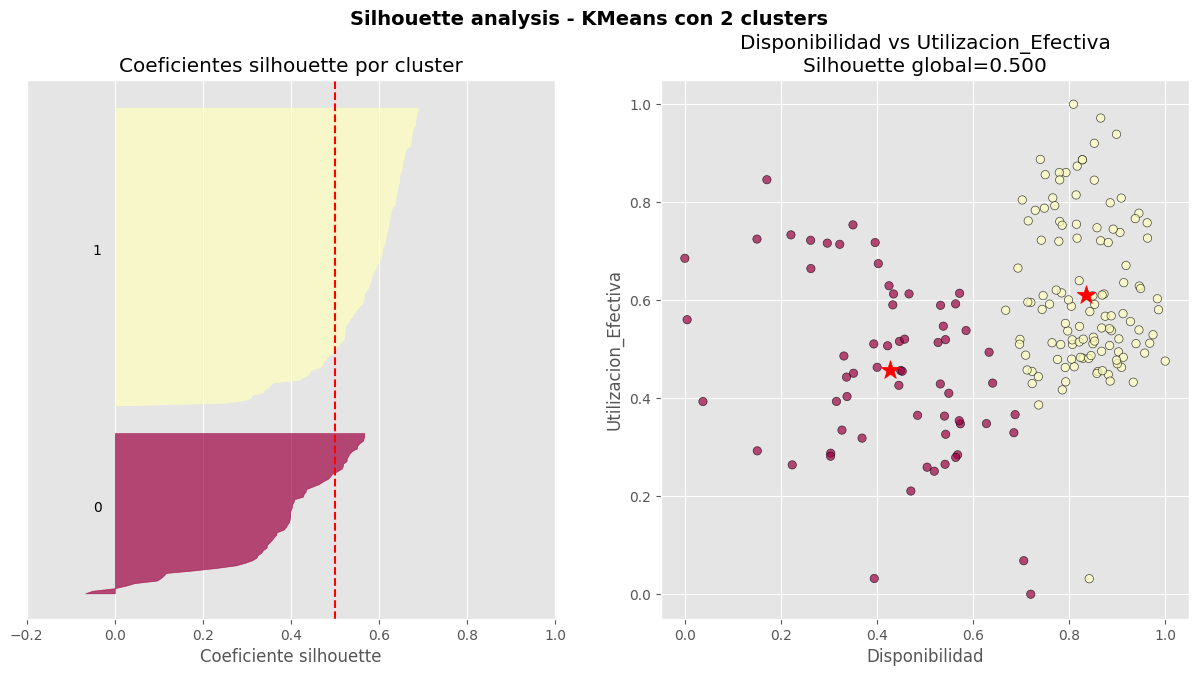

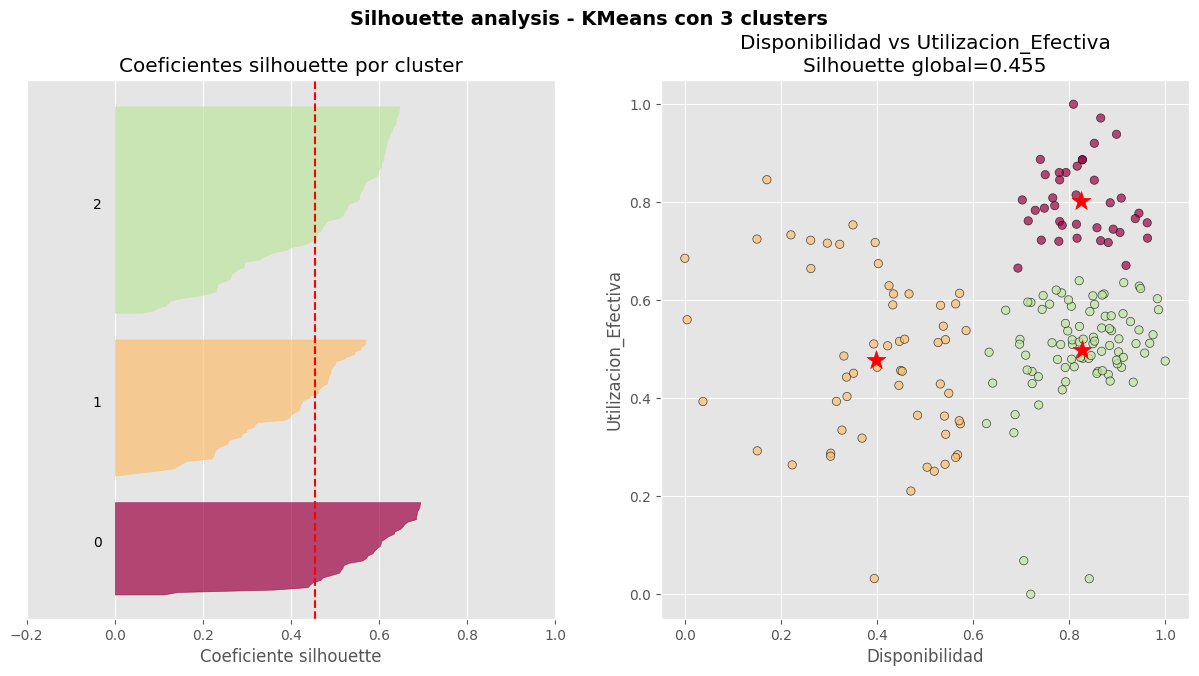

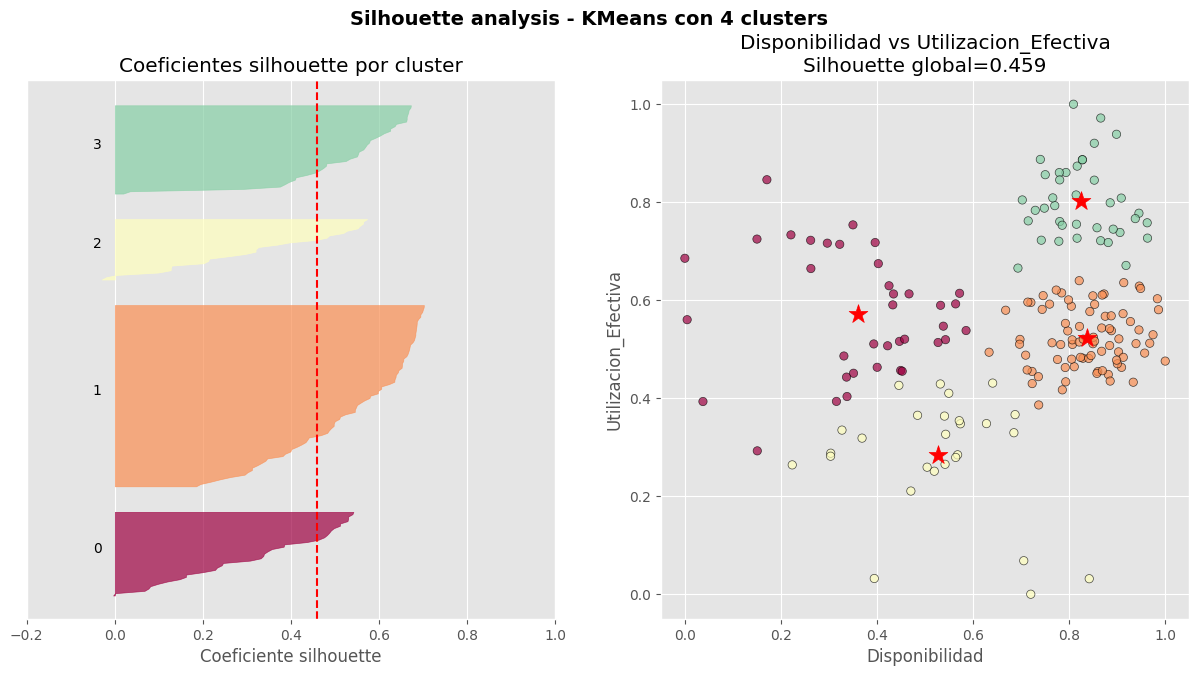

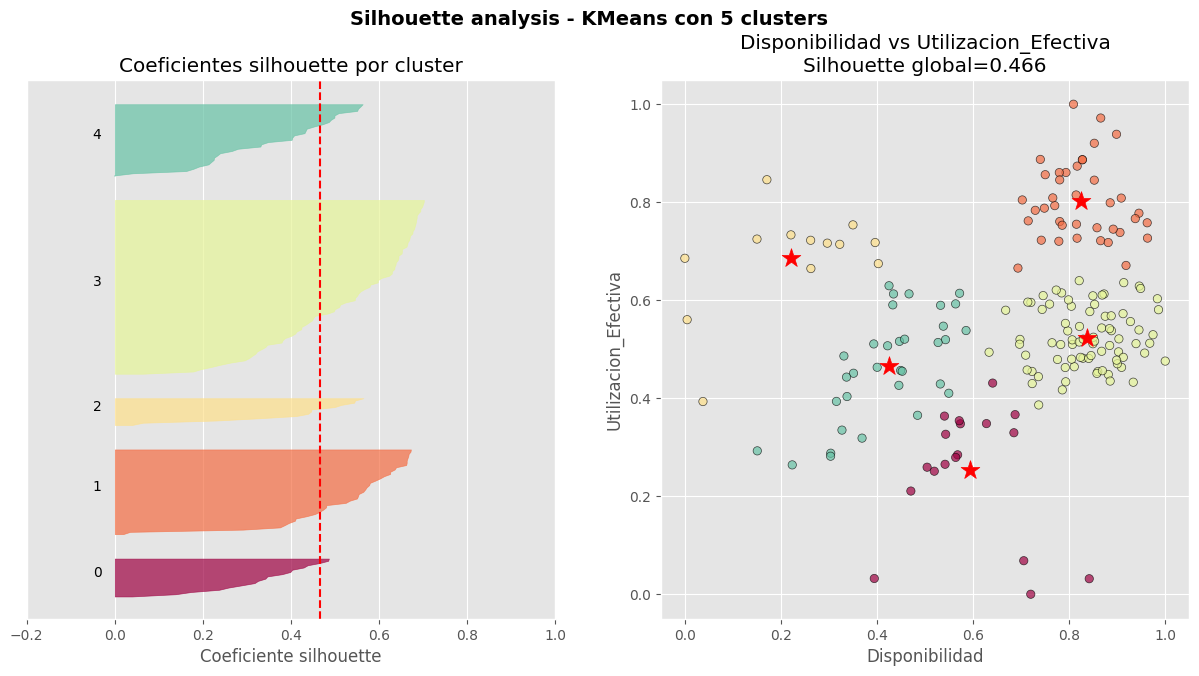

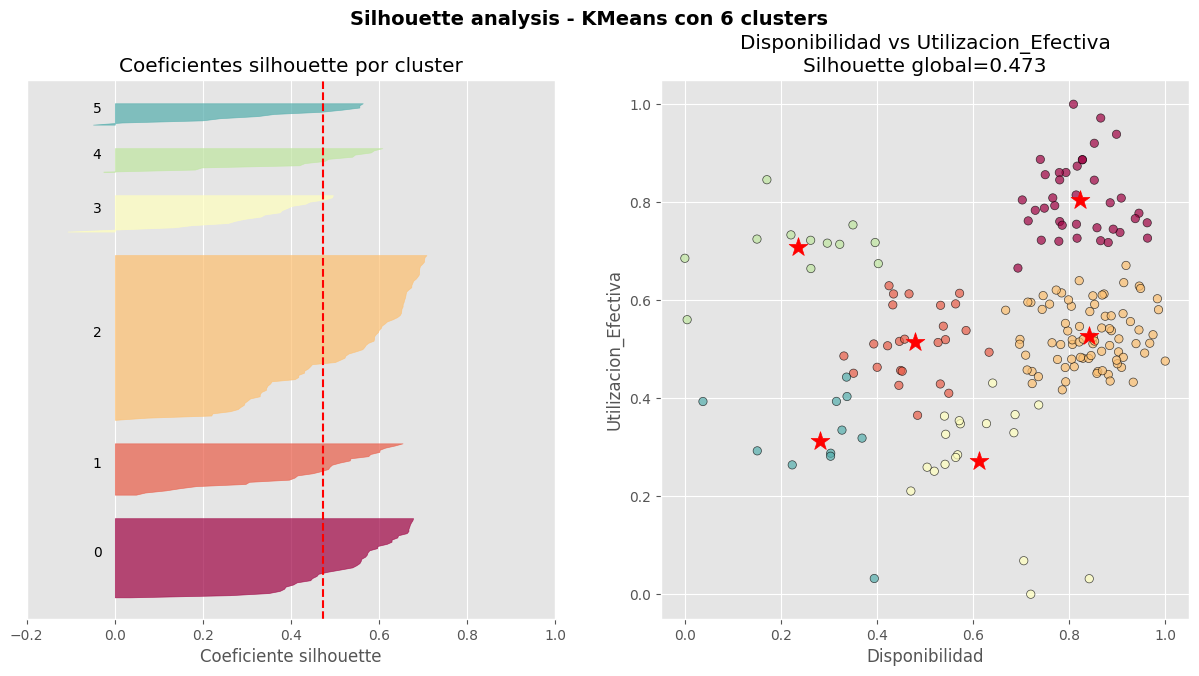

In [ ]:
for k, res in results.items():
    plot_kmeans_results(X, res["labels"], res["centers"], k, feat_x, feat_y)

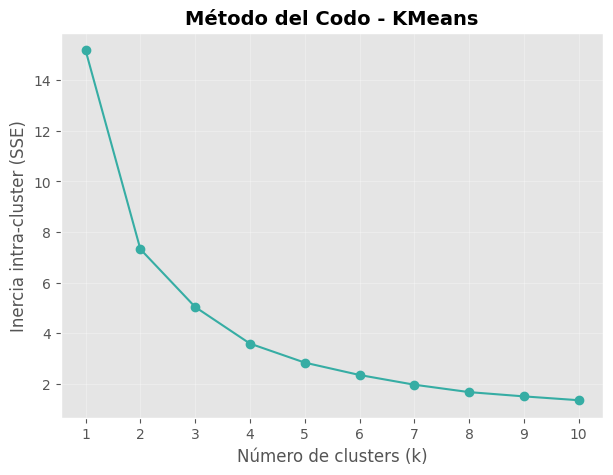

In [ ]:
# ===============================
# MÉTODO DEL CODO - KMeans
# ===============================


# Rango de clusters a evaluar
k_values = range(1, 11)
inertias = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    km.fit(X)   # <-- tu matriz de features (ej: Disponibilidad y Utilizacion_Efectiva)
    inertias.append(km.inertia_)

# --- Gráfico del Codo ---
plt.figure(figsize=(7,5))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='#36ADA4')

plt.title("Método del Codo - KMeans", fontsize=14, fontweight="bold")
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Inercia intra-cluster (SSE)", fontsize=12)
plt.xticks(k_values)        # marcas en todos los valores de k
plt.grid(True, alpha=0.3)

plt.show()

### Análisis del Método del Codo

El gráfico del codo muestra la evolución de la **inercia intra-cluster (SSE)** para valores de
*k* entre 1 y 10. La inercia disminuye de manera pronunciada entre **k=1 y k=3**, lo que indica
que aumentar el número de clústeres en este rango aporta una mejora sustancial en la
compactación de los grupos.

A partir de **k=4**, la reducción de la inercia comienza a ser más marginal y la curva se aplana,
lo que refleja que agregar más clústeres ya no aporta una mejora significativa en la calidad de la
segmentación. Este comportamiento sugiere que el **punto de inflexión o “codo” se encuentra
en torno a k=3 o k=4**.

**Conclusión:** El número óptimo de clústeres según el método del codo se ubica en el rango
**k=3–4**. En este rango se logra un equilibrio entre reducir la inercia y evitar la
sobresegmentación de los datos. Para confirmar esta elección, se recomienda complementar el
análisis con el coeficiente de silueta.

In [ ]:
# --- Dunn index robusto (soporta ruido -1 y clusters de 1 punto) ---
def dunn_index(X, labels):
    """
    Calcula el Dunn index = (distancia mínima entre clusters) / (diámetro intra-cluster máximo).
    - Ignora puntos de ruido (-1).
    - Si queda <2 clusters válidos o todos tienen 1 punto => devuelve np.nan.
    IMPORTANTE: X debe ser el MISMO espacio en el que evaluas los clusters
    (ej: si clusterizaste con [Disponibilidad, Utilizacion_Efectiva], pasa ese X).
    """
    # 1) quitar ruido si existe
    mask = labels != -1
    if mask.sum() < 3:
        return np.nan
    X_ = X[mask]
    y_ = labels[mask]

    # 2) clusters válidos
    cl = np.unique(y_)
    if len(cl) < 2:
        return np.nan

    # 3) matriz de distancias
    D = pairwise_distances(X_)

    # 4) diámetro intra (máxima distancia dentro de cada cluster)
    intra_diams = []
    for c in cl:
        idx = np.where(y_ == c)[0]
        if len(idx) >= 2:
            intra_diams.append(D[np.ix_(idx, idx)].max())
    if len(intra_diams) == 0:   # todos de tamaño 1
        return np.nan
    intra_max = np.max(intra_diams)

    # 5) distancia mínima inter-cluster
    inter_min = np.inf
    for i, ci in enumerate(cl):
        Ii = np.where(y_ == ci)[0]
        for cj in cl[i+1:]:
            Ij = np.where(y_ == cj)[0]
            # mínima distancia entre puntos de clusters distintos
            inter_min = min(inter_min, D[np.ix_(Ii, Ij)].min())

    # 6) cociente
    return inter_min / intra_max if intra_max > 0 else np.nan


In [ ]:
# --- Resumen de métricas (Silhouette + Dunn; Homogeneity/Completeness opcionales) ---
def run_metrics(X, labels, y_true=None, title=None):
    """
    Imprime y devuelve métricas del clustering:
    - Nº de clusters (excluyendo ruido -1)
    - Silhouette global (si hay >=2 clusters válidos)
    - Dunn index (robusto a ruido)
    - (Opcional) Homogeneity y Completeness si tienes etiquetas verdaderas y_true
    Devuelve un dict con las métricas.
    """
    # 0) clusters válidos (ignora ruido)
    valid_mask = labels != -1
    n_clusters = len(set(labels[valid_mask])) if np.any(valid_mask) else len(set(labels))
    if title:
        print(f"=== {title} ===")
    print(f"N° clusters (válidos, sin ruido): {n_clusters}")

    # 1) Silhouette (solo si hay al menos 2 clusters válidos)
    if n_clusters >= 2:
        sil = silhouette_score(X[valid_mask], labels[valid_mask])
        print(f"Silhouette Score: {sil:.3f}")
    else:
        sil = np.nan
        print("Silhouette Score: n/a (menos de 2 clusters válidos)")

    # 2) Dunn
    dunn = dunn_index(X, labels)
    print(f"Dunn index: {dunn:.3f}" if not np.isnan(dunn) else "Dunn index: n/a")

    # 3) (Opcional) si tienes clases verdaderas
    if y_true is not None:
        try:
            print(f"Homogeneity: {homogeneity_score(y_true, labels):.3f}")
            print(f"Completeness: {completeness_score(y_true, labels):.3f}")
        except Exception:
            print("Homogeneity/Completeness: no aplican al no haber y_true consistente.")

    return {"n_clusters": n_clusters, "silhouette": sil, "dunn": dunn}

In [ ]:
# 2) entrena KMeans con el k elegido (por codo/silhouette)
k = 4  # ejemplo
km = KMeans(n_clusters=k, n_init=10, random_state=SEED)
labels_km = km.fit_predict(X)

# 3) evalúa
_ = run_metrics(X, labels_km, title=f"KMeans sobre [{feat_x}, {feat_y}] (k={k})")

=== KMeans sobre [Disponibilidad, Utilizacion_Efectiva] (k=4) ===
N° clusters (válidos, sin ruido): 4
Silhouette Score: 0.459
Dunn index: 0.045


## 4.2 DBSCAN



Es un algoritmo de clustering basado en densidad. Consiste en determinar en qué áreas existen concentraciones de puntos y dónde están separados por áreas vacías o con escasos puntos. Los puntos que no forman parte de un clúster se etiquetan como ruido.

Este tipo de algoritmo detecta automáticamente patrones basándose puramente en la ubicación espacial y en la distancia a un número de vecinos especificado.

Al contrario de la estrategia seguida por k-means, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) no presupone clusters convexos, sino que se basa en la densidad de las muestras para identificar los clusters. Por este motivo, los clusters identificados por DBSCAN pueden ser de cualquier forma.


Parametros:
* **Eps**: máxima distancia entre dos muestras para poder ser consideradas pertenecientes al mismo "vecindario"
* **MinPts**: número de muestras en un vecindario para que un punto pueda ser considerado core point.

In [ ]:
# Entrenar DBSCAN
dbscan = DBSCAN(eps = 0.09, min_samples = 12)
dbscan_pred = dbscan.fit_predict(X)

## Elección de parámetros

En este caso, se seleccionaron los valores **`eps = 0.09`** y **`min_samples = 9`** con base en los siguientes criterios:

- **Escala de los datos:** las variables *Disponibilidad* y *Utilización Efectiva* fueron previamente estandarizadas y se encuentran en el rango [0,1]. En este contexto, un `eps` grande (ej. 0.5–0.9) conecta prácticamente a todos los puntos en un único clúster, perdiendo capacidad de diferenciación. Por ello, fue necesario utilizar un **eps pequeño (0.09)**, que permite capturar las concentraciones locales de puntos sin fusionar todo el conjunto en un único grupo.

- **Regla práctica para min_samples:** un valor típico es entre **2 × n_features y 4 × n_features**. Dado que trabajamos en 2D (dos variables), el rango recomendado es de 4 a 8. Se eligió un valor más exigente (**12**) para asegurar que cada clúster esté formado por grupos relativamente densos y no por coincidencias aleatorias de pocos puntos. Esto también ayuda a filtrar mejor el ruido.

- **Validación empírica:** al aplicar estos parámetros, DBSCAN detectó **múltiples clústeres bien definidos** junto con un conjunto de puntos etiquetados como ruido (`-1`). Esto es deseable, ya que el ruido puede representar observaciones atípicas o patrones operacionales menos frecuentes.

**Conclusión:**  
La elección de `eps = 0.09` y `min_samples = 12` permitió a DBSCAN identificar clústeres compactos y separados en el espacio definido por *Disponibilidad* y *Utilización Efectiva*. Con un `eps` demasiado grande se obtenía un único clúster, mientras que con `min_samples` demasiado bajo aparecían clústeres sin valor. Esta configuración balancea densidad y robustez, entregando una segmentación más realista de los patrones operacionales.


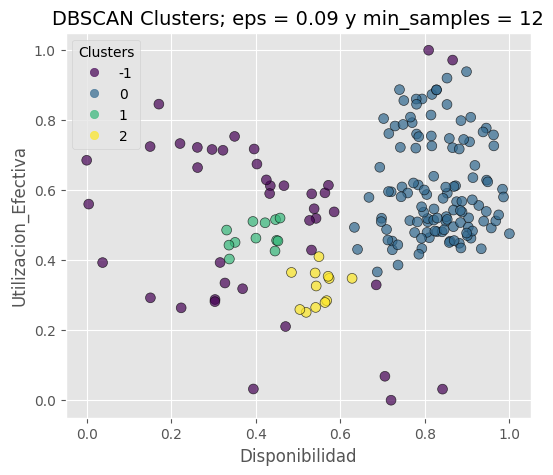

In [ ]:
# Graficar clusters de DBSCAN
plot_some_clusters(
    X[:, 0],
    X[:, 1],
    xlabel=feat_x,
    ylabel=feat_y,
    title="DBSCAN Clusters; eps = 0.09 y min_samples = 12",
    color=dbscan_pred   # usamos directamente las etiquetas de DBSCAN
)

Los cluster -1 representan datos que no cumplen las condiciones del algoritmo, para decir que pertenecen a un grupo o no, por lo que estos datos no pertencen a ningún grupo

In [ ]:


# Create an output widget to contain the plot
output = widgets.Output()

# Create sliders for parameter adjustment
eps_slider = widgets.FloatSlider(min=0.01, max=0.3, step=0.01, value=0.08, description='Eps:')
min_samples_slider = widgets.IntSlider(min=1, max=12, value=12, description='Min Samples:')



def update_clusters(eps, min_samples):
    with output:
        clear_output(wait=True)

        # Entrenamos DBSCAN con los parámetros elegidos
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Graficamos resultados
        fig, ax = plt.subplots(figsize=(6, 5))
        points = ax.scatter(
            X[:, 0], X[:, 1],
            s=50, c=labels, edgecolor='black', alpha=0.7
        )
        handles, _ = points.legend_elements()
        ax.legend(handles, np.unique(labels), title='Clusters', loc="upper right")
        ax.set_xlabel(feat_x, fontsize=12)   # 👈 Nombre real de la variable
        ax.set_ylabel(feat_y, fontsize=12)   # 👈 Nombre real de la variable
        ax.set_title(f"DBSCAN Clustering (eps={eps:.3f}, min_samples={min_samples})", fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.show()

# Callback cuando se mueven los sliders
def on_value_change(change):
    update_clusters(eps_slider.value, min_samples_slider.value)

eps_slider.observe(on_value_change, 'value')
min_samples_slider.observe(on_value_change, 'value')

# Mostrar widgets + gráfico inicial
display(widgets.VBox([eps_slider, min_samples_slider, output]))
update_clusters(eps_slider.value, min_samples_slider.value)

# 5 Realizar un análisis de componentes principales (PCA)

In [ ]:
df_encoded_scaled.head()

Dia  DistanciaPromedio  TiempoCiclo  CiclosTurno  Toneladas  Efectivo  \
0  0.0           0.378224     0.301708     0.382353   0.258266  0.150849   
1  0.0           0.182580     0.343928     0.558824   0.397070  0.090001   
2  0.0           0.356114     0.547913     0.205882   0.271855  0.227170   
3  0.0           0.534673     0.603416     0.147059   0.187850  0.000000   
4  0.0           0.769179     0.511385     0.205882   0.318377  0.074736   

         FS   Demoras   Reserva  Perdidas  ...  Equipo_101  Equipo_102  \
0  0.665290  1.000000  0.988604  0.298004  ...         1.0         0.0   
1  0.314326  0.994849  0.944444  0.778271  ...         1.0         0.0   
2  0.513080  0.586917  0.660969  0.689579  ...         0.0         1.0   
3  0.630119  0.684265  0.988604  0.775166  ...         0.0         1.0   
4  0.168822  0.977852  0.968661  0.866962  ...         0.0         0.0   

   Equipo_103  Turno_Dia  Turno_Noche  Clima_Lluvia ligera  Clima_Seco  \
0         0.0        1.0          0.0                  0.0         1.0   
1         0.0        0.0          1.0                  0.0         1.0   
2         0.0        1.0          0.0                  0.0         1.0   
3         0.0        0.0          1.0                  1.0         0.0   
4         1.0        1.0          0.0                  0.0         1.0   

   CondicionCamino_Buena  CondicionCamino_Mala  CondicionCamino_Regular  
0                    0.0                   0.0                      1.0  
1                    0.0                   1.0                      0.0  
2                    0.0                   0.0                      1.0  
3                    0.0                   1.0                      0.0  
4                    0.0                   0.0                      1.0  

[5 rows x 24 columns]

Se tienen 24 columnas, cada una represdenta una dimensión. Se debe discriminar las variables entre sí con el objetivo de Realizar un análisis de componentes principales (PCA) para determinar los principales factores que permiten explicar a lo menos el 80% de la varianza de los
datos.




El **Análisis de Componentes Principales (PCA, Principal Component Analysis)** es una técnica de reducción de dimensionalidad que busca transformar un conjunto de variables originales (en este caso, las 24 columnas) en un nuevo conjunto de variables llamadas **componentes principales**.

Características clave de PCA:

* Cada componente principal es una **combinación lineal** de las variables originales.
* Los componentes se ordenan según la cantidad de **varianza explicada**:

  * El **1º componente** captura la mayor parte de la varianza total.
  * El **2º componente** explica la mayor parte de la varianza restante, y así sucesivamente.
* El objetivo práctico es quedarnos con los primeros componentes que explican la **mayor parte de la información** (por ejemplo, ≥80%), reduciendo el número de dimensiones sin perder mucha información.

En este caso:

* Entrenaremos PCA con las 24 variables.
* Veremos la **varianza explicada acumulada**.
* Identificaremos el **número mínimo de componentes que explican ≥80%**.
* Esto nos dirá con cuántos “factores” podemos resumir los patrones operacionales de los equipos sin perder demasiada información.



Dimensiones de X_pca: (182, 24)
Componente 1: Varianza explicada = 0.225, Acumulada = 0.225
Componente 2: Varianza explicada = 0.175, Acumulada = 0.400
Componente 3: Varianza explicada = 0.139, Acumulada = 0.539
Componente 4: Varianza explicada = 0.122, Acumulada = 0.661
Componente 5: Varianza explicada = 0.105, Acumulada = 0.766
Componente 6: Varianza explicada = 0.069, Acumulada = 0.836
Componente 7: Varianza explicada = 0.044, Acumulada = 0.880
Componente 8: Varianza explicada = 0.037, Acumulada = 0.917
Componente 9: Varianza explicada = 0.031, Acumulada = 0.948
Componente 10: Varianza explicada = 0.023, Acumulada = 0.971
Componente 11: Varianza explicada = 0.013, Acumulada = 0.983
Componente 12: Varianza explicada = 0.010, Acumulada = 0.993
Componente 13: Varianza explicada = 0.004, Acumulada = 0.997
Componente 14: Varianza explicada = 0.002, Acumulada = 0.999
Componente 15: Varianza explicada = 0.001, Acumulada = 1.000
Componente 16: Varianza explicada = 0.000, Acumulada = 1.000
C

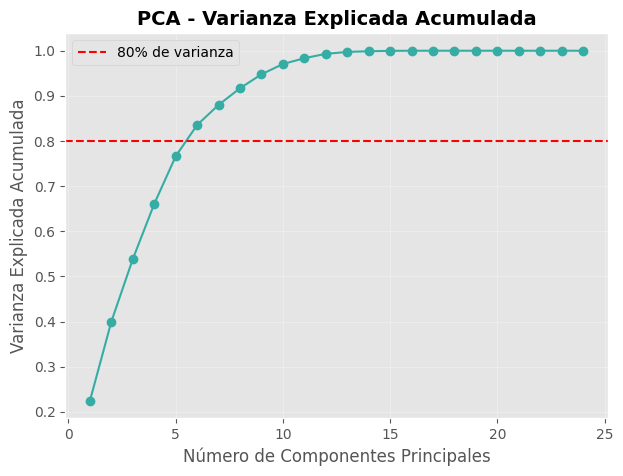


Número mínimo de componentes para explicar ≥80% de la varianza: 6


In [ ]:
# ======================================
# PCA sobre las 24 columnas de features
# ======================================


# --- 1) Construimos la matriz de features (24 columnas) ---
# Quitamos identificadores si los hay
DROP_COLS = [""]  # ajusta según corresponda
X_pca = df_encoded_scaled.drop(columns=[c for c in DROP_COLS if c in df_encoded_scaled.columns]).to_numpy(dtype=float)

print("Dimensiones de X_pca:", X_pca.shape)

# --- 2) Ajustamos PCA con todas las dimensiones ---
pca = PCA()
pca.fit(X_pca)

# --- 3) Varianza explicada por cada componente ---
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Mostramos las primeras 10 componentes como ejemplo
for i, (var, cum) in enumerate(zip(explained_variance, cumulative_variance), start=1):
    print(f"Componente {i}: Varianza explicada = {var:.3f}, Acumulada = {cum:.3f}")

# --- 4) Gráfico de varianza explicada acumulada ---
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o", linestyle="-", color="#36ADA4")
plt.axhline(y=0.80, color="red", linestyle="--", label="80% de varianza")
plt.xlabel("Número de Componentes Principales", fontsize=12)
plt.ylabel("Varianza Explicada Acumulada", fontsize=12)
plt.title("PCA - Varianza Explicada Acumulada", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# --- 5) Determinar automáticamente el nº de componentes >=80% ---
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"\nNúmero mínimo de componentes para explicar ≥80% de la varianza: {n_components_80}")


El gráfico muestra cómo la varianza explicada acumulada aumenta conforme se agregan componentes principales:

El 1º componente explica alrededor del 22% de la variabilidad total.

Con los primeros 3 componentes, ya se supera el 60%.

A partir del 6º componente, la varianza acumulada sobrepasa el 80%, alcanzando el umbral definido como criterio.

Desde el componente 10 en adelante, las ganancias marginales son muy pequeñas, lo que indica que los datos tienen una estructura latente que puede resumirse en unas pocas dimensiones.

In [ ]:
# --- 1) Ajustamos PCA nuevamente con todas las columnas ---
pca = PCA()
pca.fit(X_pca)

# --- 2) Seleccionamos las primeras 6 componentes ---
n_components = 6
explained_variance = pca.explained_variance_ratio_[:n_components]
cumulative_variance = np.cumsum(explained_variance)

# --- 3) Creamos un DataFrame resumen ---
pca_summary = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(n_components)],
    "Varianza Explicada Individual": explained_variance,
    "Varianza Explicada Acumulada": cumulative_variance
})

print(pca_summary)

  Componente  Varianza Explicada Individual  Varianza Explicada Acumulada
0        PC1                       0.224631                      0.224631
1        PC2                       0.175398                      0.400030
2        PC3                       0.138549                      0.538579
3        PC4                       0.122197                      0.660776
4        PC5                       0.105477                      0.766253
5        PC6                       0.069292                      0.835545


Análisis:
- Cada PC (componente principal) no es una variable original como Disponibilidad o Utilización, sino una combinación lineal de todas las variables originales.

- PCA crea nuevas variables sintéticas (los componentes) que maximizan la varianza explicada:

- PC1 es la combinación de variables que captura la mayor parte de la variabilidad total. PC2 es la siguiente combinación ortogonal a PC1, que explica la mayor parte de la variabilidad remanente. Y así sucesivamente.

Esto quiere decir que no eliminamos variables originales, sino que las resumimos en menos dimensiones, preservando la mayor parte de la información.

En vez de trabajar con **24 dimensiones originales**, podemos r**educir el espacio a 6 componentes principales, sin perder más del 16,5% de la variabilidad.**

Esto simplifica el análisis y facilita la aplicación de algoritmos de clustering (como KMeans o DBSCAN), evitando el problema de la alta dimensionalidad.

# 6 Utilice nuevamente los métodos kmeans y DBSCAN para identificar patrones utilizando los factores de PCA

Se procede a utilizar los resultados de operacionales entre los equipos,  utilizando los factores obtenidos al aplicar PCA, se contrastan con  con los obtenidos sin usar los factores de PCA

## 6.1 Kmens  y DBSCAN usando PCA

In [ ]:

# PCA: elegir nº de componentes que expliquen ≥80% de varianza
# -------------------------------------------------------------
pca = PCA().fit(X_pca)
cumvar = np.cumsum(pca.explained_variance_ratio_)
ncomp_80 = np.argmax(cumvar >= 0.80) + 1
print(f"[INFO] Componentes necesarios para ≥80%: {ncomp_80}")

[INFO] Componentes necesarios para ≥80%: 6


Calculamos los nuevos factores (scores) para cada observación.

Cada fila de X_pca (un equipo/día con sus 24 variables originales) se proyecta en el espacio reducido de las componentes principales.

El resultado Z_pca es una matriz con la misma cantidad de filas que los datos originales, pero solo con las 6 PCs que seleccionamos para explicar ≥80% de la varianza.

In [ ]:
pca_80 = PCA(n_components=ncomp_80, random_state=SEED).fit(X_pca)
# Los NUEVOS factores (scores) para cada fila = transformar X_pca
Z_pca = pca_80.transform(X_pca)  # matriz (n_muestras, ncomp_80)
print("\n# Z_pca shape:", Z_pca.shape)


# Z_pca shape: (182, 6)


In [ ]:
# (opcional) ver las primeras filas como DataFrame
Z_pca_df = pd.DataFrame(Z_pca, columns=[f"PC{i+1}" for i in range(pca_80.n_components_)])
print("\n# Primeras filas de los factores (scores) PCA:")
print(Z_pca_df.head())


# Primeras filas de los factores (scores) PCA:
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.684418  0.698641  0.995565 -0.243759  0.095363 -0.003707
1  0.195103 -0.668979  0.804295 -0.563099 -0.318756  0.803000
2 -0.483272  0.681046  0.016821 -0.235484  1.133846  0.239438
3 -0.793185 -1.289745 -0.782428 -0.894123  0.267123  0.561780
4 -0.632243  0.576157  0.311576  0.965336  0.491480  0.678680


In [ ]:

# Para graficar, nos quedamos con PC1 y PC2 sólo como proyección visual
Z_pc2 = Z_pca[:, :2]               # (PC1, PC2) para scatter
print("[INFO] Usaremos PC1 y PC2 sólo para la visualización de gráficos.")


[INFO] Usaremos PC1 y PC2 sólo para la visualización de gráficos.


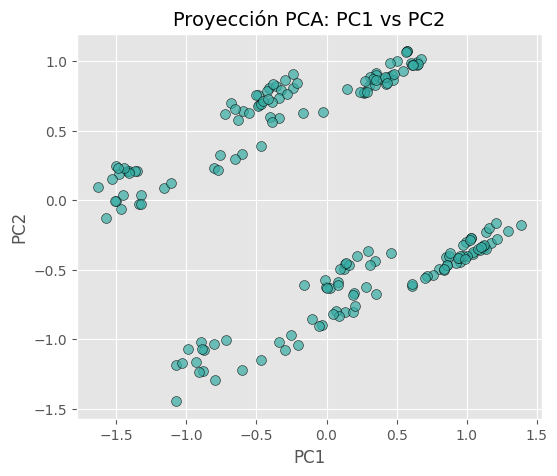

In [ ]:
# --- Visualización simple en el plano de PC1 y PC2 (solo para ver la nube) ---
_ = plot_some_clusters(
    Z_pc2[:, 0], Z_pc2[:, 1],
    xlabel="PC1", ylabel="PC2",
    title="Proyección PCA: PC1 vs PC2",
    color="#36ADA4"
)

[INFO] KMeans en espacio PCA (scores Z_pca)
  k=2: silhouette=0.227
  k=3: silhouette=0.254
  k=4: silhouette=0.252
  k=5: silhouette=0.279
  k=6: silhouette=0.309
[SELECCIÓN] Mejor k por silhouette en PCA: k=6 (sil=0.309)


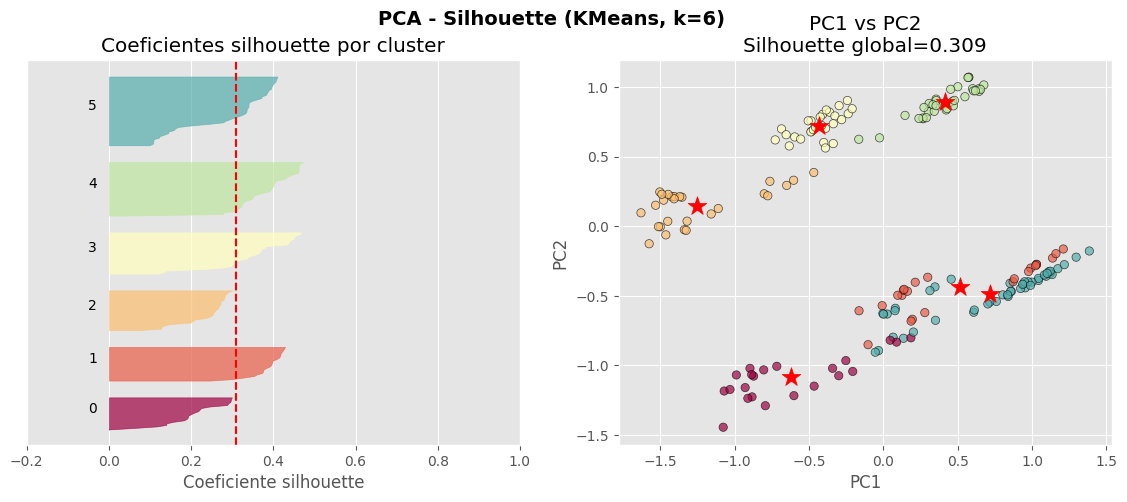

In [ ]:
# --- Barrido de k sobre Z_pca (no solo PC1–PC2) ---
range_n_clusters = [2,3,4,5,6]
results_pca = {}

print("[INFO] KMeans en espacio PCA (scores Z_pca)")
for k in range_n_clusters:
    km = KMeans(n_clusters=k, n_init=10, random_state=SEED)
    labels = km.fit_predict(Z_pca)
    sil = silhouette_score(Z_pca, labels)
    results_pca[k] = {"labels": labels, "centers": km.cluster_centers_, "sil": sil}
    print(f"  k={k}: silhouette={sil:.3f}")

# --- Elegir k con mejor silhouette ---
best_k = max(results_pca, key=lambda kk: results_pca[kk]["sil"])
print(f"[SELECCIÓN] Mejor k por silhouette en PCA: k={best_k} (sil={results_pca[best_k]['sil']:.3f})")

# --- Función de plot adaptada a PCA: evalúa silhouette en Z_pca, grafica en Z_pc2 ---
def plot_kmeans_results_pca(Z_pca, Z_pc2, y_pred, centers_full, n_clusters):
    # Silhouette evaluado en todo el espacio PCA (no solo 2D)
    s_global = silhouette_score(Z_pca, y_pred)
    s_samples = silhouette_samples(Z_pca, y_pred)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
    plt.suptitle(f"PCA - Silhouette (KMeans, k={n_clusters})", fontsize=14, fontweight="bold")

    # Izq: barras silhouette
    ax1.set_title("Coeficientes silhouette por cluster")
    ax1.set_xlabel("Coeficiente silhouette")
    ax1.set_xlim([-0.2, 1.0])
    ax1.set_ylim([0, len(Z_pca) + (n_clusters + 1) * 10])
    ax1.yaxis.set_visible(False)

    y_lower = 10
    for label in range(n_clusters):
        ith = np.sort(s_samples[y_pred == label])
        size = ith.shape[0]
        y_upper = y_lower + size
        color = cm.Spectral(float(label)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5*size, str(label))
        y_lower = y_upper + 10
    ax1.axvline(x=s_global, color="red", linestyle="--")

    # Der: scatter en PC1–PC2 (solo proyección visual)
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(Z_pc2[:,0], Z_pc2[:,1], c=colors, alpha=0.7, edgecolor="k")
    # Proyectamos los centros al plano PC1–PC2 (tomando sus 2 primeras coords)
    ax2.scatter(centers_full[:,0], centers_full[:,1], c="red", s=200, marker="*")
    ax2.set_xlabel("PC1"); ax2.set_ylabel("PC2")
    ax2.set_title(f"PC1 vs PC2\nSilhouette global={s_global:.3f}")
    plt.show()

# --- Graficar el mejor k seleccionado ---
labels_km_pca = results_pca[best_k]["labels"]
centers_km_pca = results_pca[best_k]["centers"][:, :2]  # proyectados al plano 2D para el plot
plot_kmeans_results_pca(Z_pca, Z_pc2, labels_km_pca, centers_km_pca, best_k)

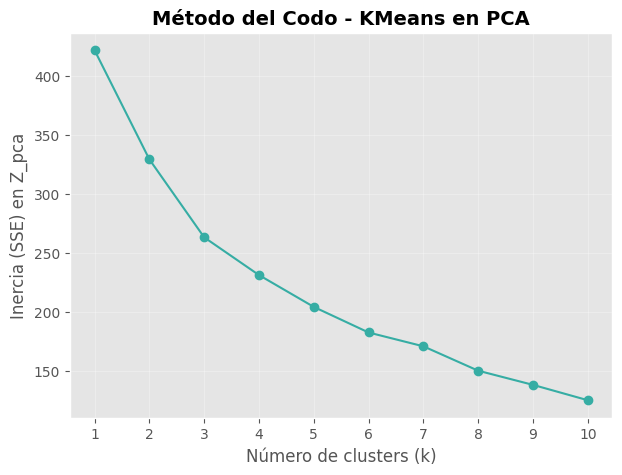

In [ ]:
# --- Método del Codo en Z_pca ---
k_values = range(1, 11)
inertias = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=SEED, n_init=10).fit(Z_pca)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='#36ADA4')
plt.title("Método del Codo - KMeans en PCA", fontsize=14, fontweight="bold")
plt.xlabel("Número de clusters (k)"); plt.ylabel("Inercia (SSE) en Z_pca")
plt.xticks(k_values); plt.grid(True, alpha=0.3)
plt.show()

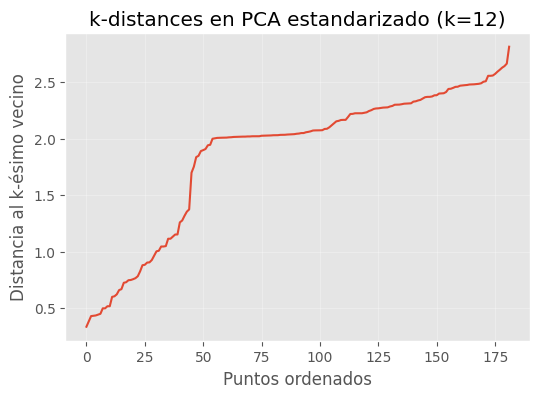

[DBSCAN-PCA] eps candidatos: [2.163 2.226 2.275 2.309 2.365 2.412 2.476 2.554]
  eps=2.163 -> clusters=4, ruido=38, sil=0.30264696524071444
  eps=2.226 -> clusters=5, ruido=24, sil=0.2889033956069385
  eps=2.275 -> clusters=2, ruido=12, sil=0.1907623401446877
  eps=2.309 -> clusters=1, ruido=7, sil=n/a
  eps=2.365 -> clusters=1, ruido=4, sil=n/a
  eps=2.412 -> clusters=1, ruido=0, sil=n/a
  eps=2.476 -> clusters=1, ruido=0, sil=n/a
  eps=2.554 -> clusters=1, ruido=0, sil=n/a

[TOP DBSCAN-PCA]
         eps  clusters  noise_pts  silhouette
0  2.162966         4         38    0.302647
1  2.225757         5         24    0.288903
2  2.274627         2         12    0.190762
5  2.411892         1          0         NaN
6  2.475658         1          0         NaN


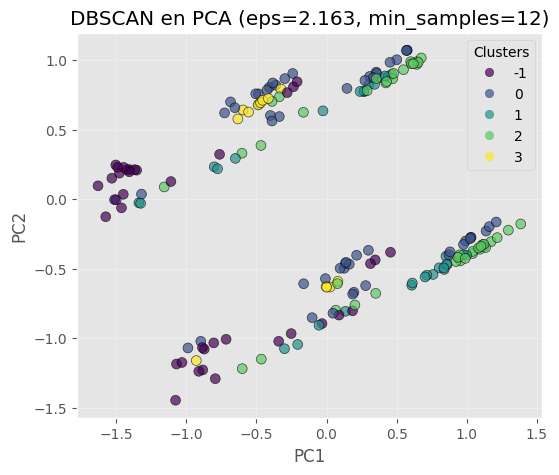

In [ ]:
from sklearn.neighbors import NearestNeighbors
# --- Estandarizar los scores PCA para DBSCAN ---
sc_z = StandardScaler()
Z_std = sc_z.fit_transform(Z_pca)

# --- k-distance plot para sugerir eps ---
min_samples = 12  # consistente con tu análisis previo
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(Z_std)
dists, _ = nbrs.kneighbors(Z_std)
kdist = np.sort(dists[:, -1])

plt.figure(figsize=(6,4))
plt.plot(kdist)
plt.title(f"k-distances en PCA estandarizado (k={min_samples})")
plt.xlabel("Puntos ordenados"); plt.ylabel("Distancia al k-ésimo vecino")
plt.grid(True, alpha=0.3)
plt.show()

# --- Barrido de eps candidatos (cuantiles) ---
eps_grid = np.quantile(kdist, np.linspace(0.60, 0.95, 8))
print("[DBSCAN-PCA] eps candidatos:", np.round(eps_grid, 3))

# --- Evaluación por silhouette (solo si >=2 clusters válidos) ---
rows = []
for eps in eps_grid:
    db = DBSCAN(eps=float(eps), min_samples=min_samples)
    lab = db.fit_predict(Z_std)
    valid = lab != -1
    ncl = len(np.unique(lab[valid])) if valid.any() else 0
    sil = silhouette_score(Z_std[valid], lab[valid]) if ncl >= 2 else np.nan
    rows.append((eps, ncl, int(np.sum(lab==-1)), sil))
    print(f"  eps={eps:.3f} -> clusters={ncl}, ruido={np.sum(lab==-1)}, sil={sil if not np.isnan(sil) else 'n/a'}")

res_db = pd.DataFrame(rows, columns=["eps","clusters","noise_pts","silhouette"]).sort_values(
    by=["silhouette","clusters","noise_pts"], ascending=[False, False, True]
)
print("\n[TOP DBSCAN-PCA]\n", res_db.head(5))

best_eps = float(res_db.iloc[0]["eps"])
db_pca = DBSCAN(eps=best_eps, min_samples=min_samples).fit(Z_std)
labels_db_pca = db_pca.labels_

# --- Plot en PC1–PC2 con etiquetas DBSCAN ---
plt.figure(figsize=(6,5))
pts = plt.scatter(Z_pc2[:,0], Z_pc2[:,1], c=labels_db_pca, s=50, edgecolor="k", alpha=0.7)
handles, _ = pts.legend_elements()
plt.legend(handles, np.unique(labels_db_pca), title="Clusters")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"DBSCAN en PCA (eps={best_eps:.3f}, min_samples={min_samples})")
plt.grid(True, alpha=0.3)
plt.show()

## 6.2 Comparación de resultados sin PCA y con PCA

# 12 Referencias

1.

2.

3.

# 13 Descarga HTML

In [ ]:
import nbformat

src_path = "/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Hitos/Hito 3/Hito_3.ipynb"

nb = nbformat.read(src_path, as_version=4)
print("OK. nbformat:", nb.nbformat, ".", nb.nbformat_minor, " | celdas:", len(nb.cells))

OK. nbformat: 4 . 0  | celdas: 103


In [ ]:
# 1) Instalar versiones compatibles
!pip -q install "nbconvert==7.16.4" "mistune==3.0.2" "jinja2==3.1.4" \
                "pygments==2.18.0" "jupyterlab-pygments==0.3.0" \
                "beautifulsoup4" "tinycss2" "bleach" "defusedxml"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
import nbformat
from nbconvert import HTMLExporter
from traitlets.config import Config

nb_path = "/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Hitos/Hito 3/Hito_3.ipynb"

# 1) Leer el notebook
with open(nb_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# 2) Quitar metadatos de widgets inconsistentes
WIDGET_STATE_MIMETYPE = "application/vnd.jupyter.widget-state+json"
widgets_md = nb.metadata.get("widgets", None)
if isinstance(widgets_md, dict):
    w = widgets_md.get(WIDGET_STATE_MIMETYPE)
    # Si falta la clave 'state' o la estructura no está bien, elimina todo el bloque 'widgets'
    if not isinstance(w, dict) or "state" not in w:
        nb.metadata.pop("widgets", None)

# 3) Remover outputs tipo widget-view para evitar filtros que fallen
for cell in nb.cells:
    if cell.get("cell_type") == "code":
        for out in cell.get("outputs", []):
            data = getattr(out, "data", None)
            if isinstance(data, dict):
                # vista de widgets en outputs
                data.pop("application/vnd.jupyter.widget-view+json", None)

# 4) Exportar a HTML (plantilla básica)
c = Config()
c.HTMLExporter.exclude_input = False          # True si quieres ocultar el código
c.HTMLExporter.exclude_output_prompt = True   # oculta prompts como 'Out[1]:'
html_exporter = HTMLExporter(config=c)

body, resources = html_exporter.from_notebook_node(nb)

# 5) Guardar el HTML
out_html = "/content/Hito_3.html"
with open(out_html, "w", encoding="utf-8") as f:
    f.write(body)

print(f"HTML generado en {out_html}")

HTML generado en /content/Hito_3.html
